In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install seaborn
!pip install statsmodels

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 176.0 MB 5.5 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=22d06fad355b56cd6d9401b5661379064572302c999a54d60deda0f2fd70b5b3
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


In [3]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [5]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:41398 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphs8bb5lw
  JVM stdout: /tmp/tmphs8bb5lw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphs8bb5lw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:41398
Connecting to H2O server at http://127.0.0.1:41398 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_f3u586
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
#For H2O
url = "https://github.com/Nikita5137/Data-Science-Methods-and-Tools/raw/master/UniversalBank.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
#For Pandas
import pandas as pd
df_pd=pd.read_csv('https://github.com/Nikita5137/Data-Science-Methods-and-Tools/raw/master/UniversalBank.csv')
df_pd.head()
df_pd_org=df_pd.copy()

In [9]:
#First five rows
df_pd.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
#Get Stats of all the columns
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
#Description of all the columns 
df_pd.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


 From the table above, we can see there are some missing vales for PersonalLoan.

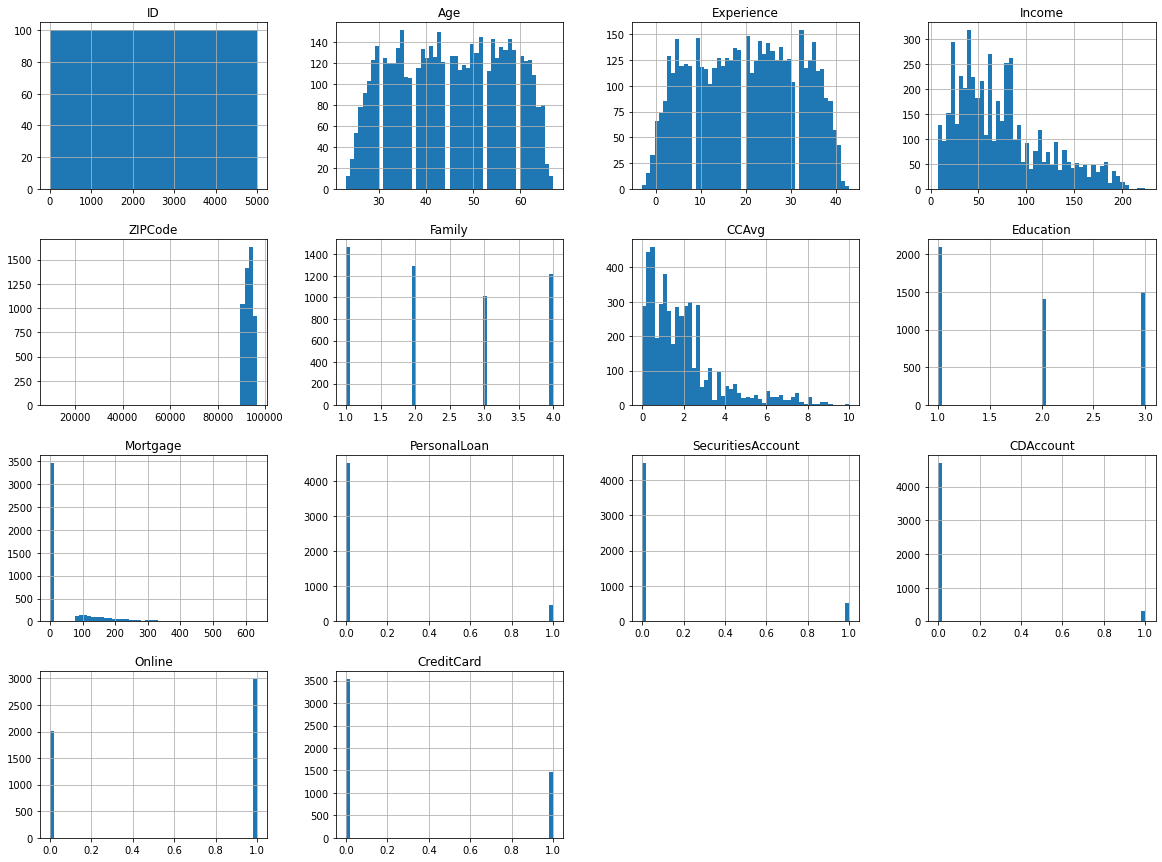

In [12]:
#Graph for every Column
import matplotlib.pyplot as plt
df_pd.hist(bins=50, figsize=(20,15))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between PersonalLoan and Income')

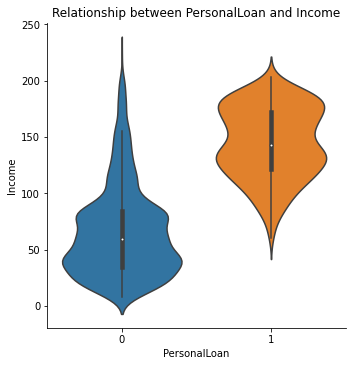

In [14]:
#Relation between age and Personal loan
import seaborn as sns
sns.catplot('PersonalLoan','Income',data=df_pd_org,kind='violin')
plt.title('Relationship between PersonalLoan and Income')

For the Diagram Above , we can see that Income is an important Factor. Income affects the chnaces of taking Personal Loan.

Text(0.5, 1.0, 'Relationship between Personal Loan and Family')

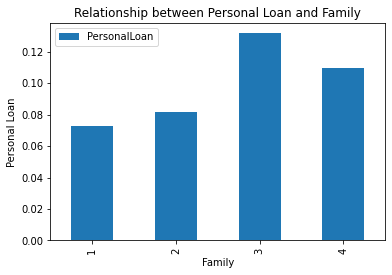

In [18]:
# Relation  Between Family and PersonalLoan
df_pd_org[['Family','PersonalLoan']].groupby('Family').mean('PersonalLoan').plot(kind='bar')
plt.ylabel('Personal Loan')
plt.title('Relationship between Personal Loan and Family')

No of Members doesnt affect the chances of taking Personal Loan.


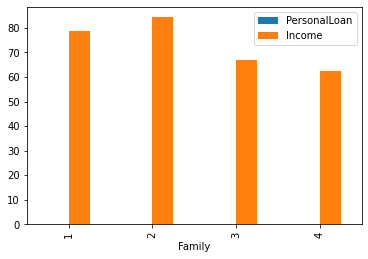

In [21]:
# Relation for Age with PersonalLoan and Family
df_pd_org[['Family','PersonalLoan','Income']].groupby('Family').mean(['PersonalLoan','Income']).plot(kind='bar')

It seems Age not playing a great role in Personal Loan. But we will ignore it for now.


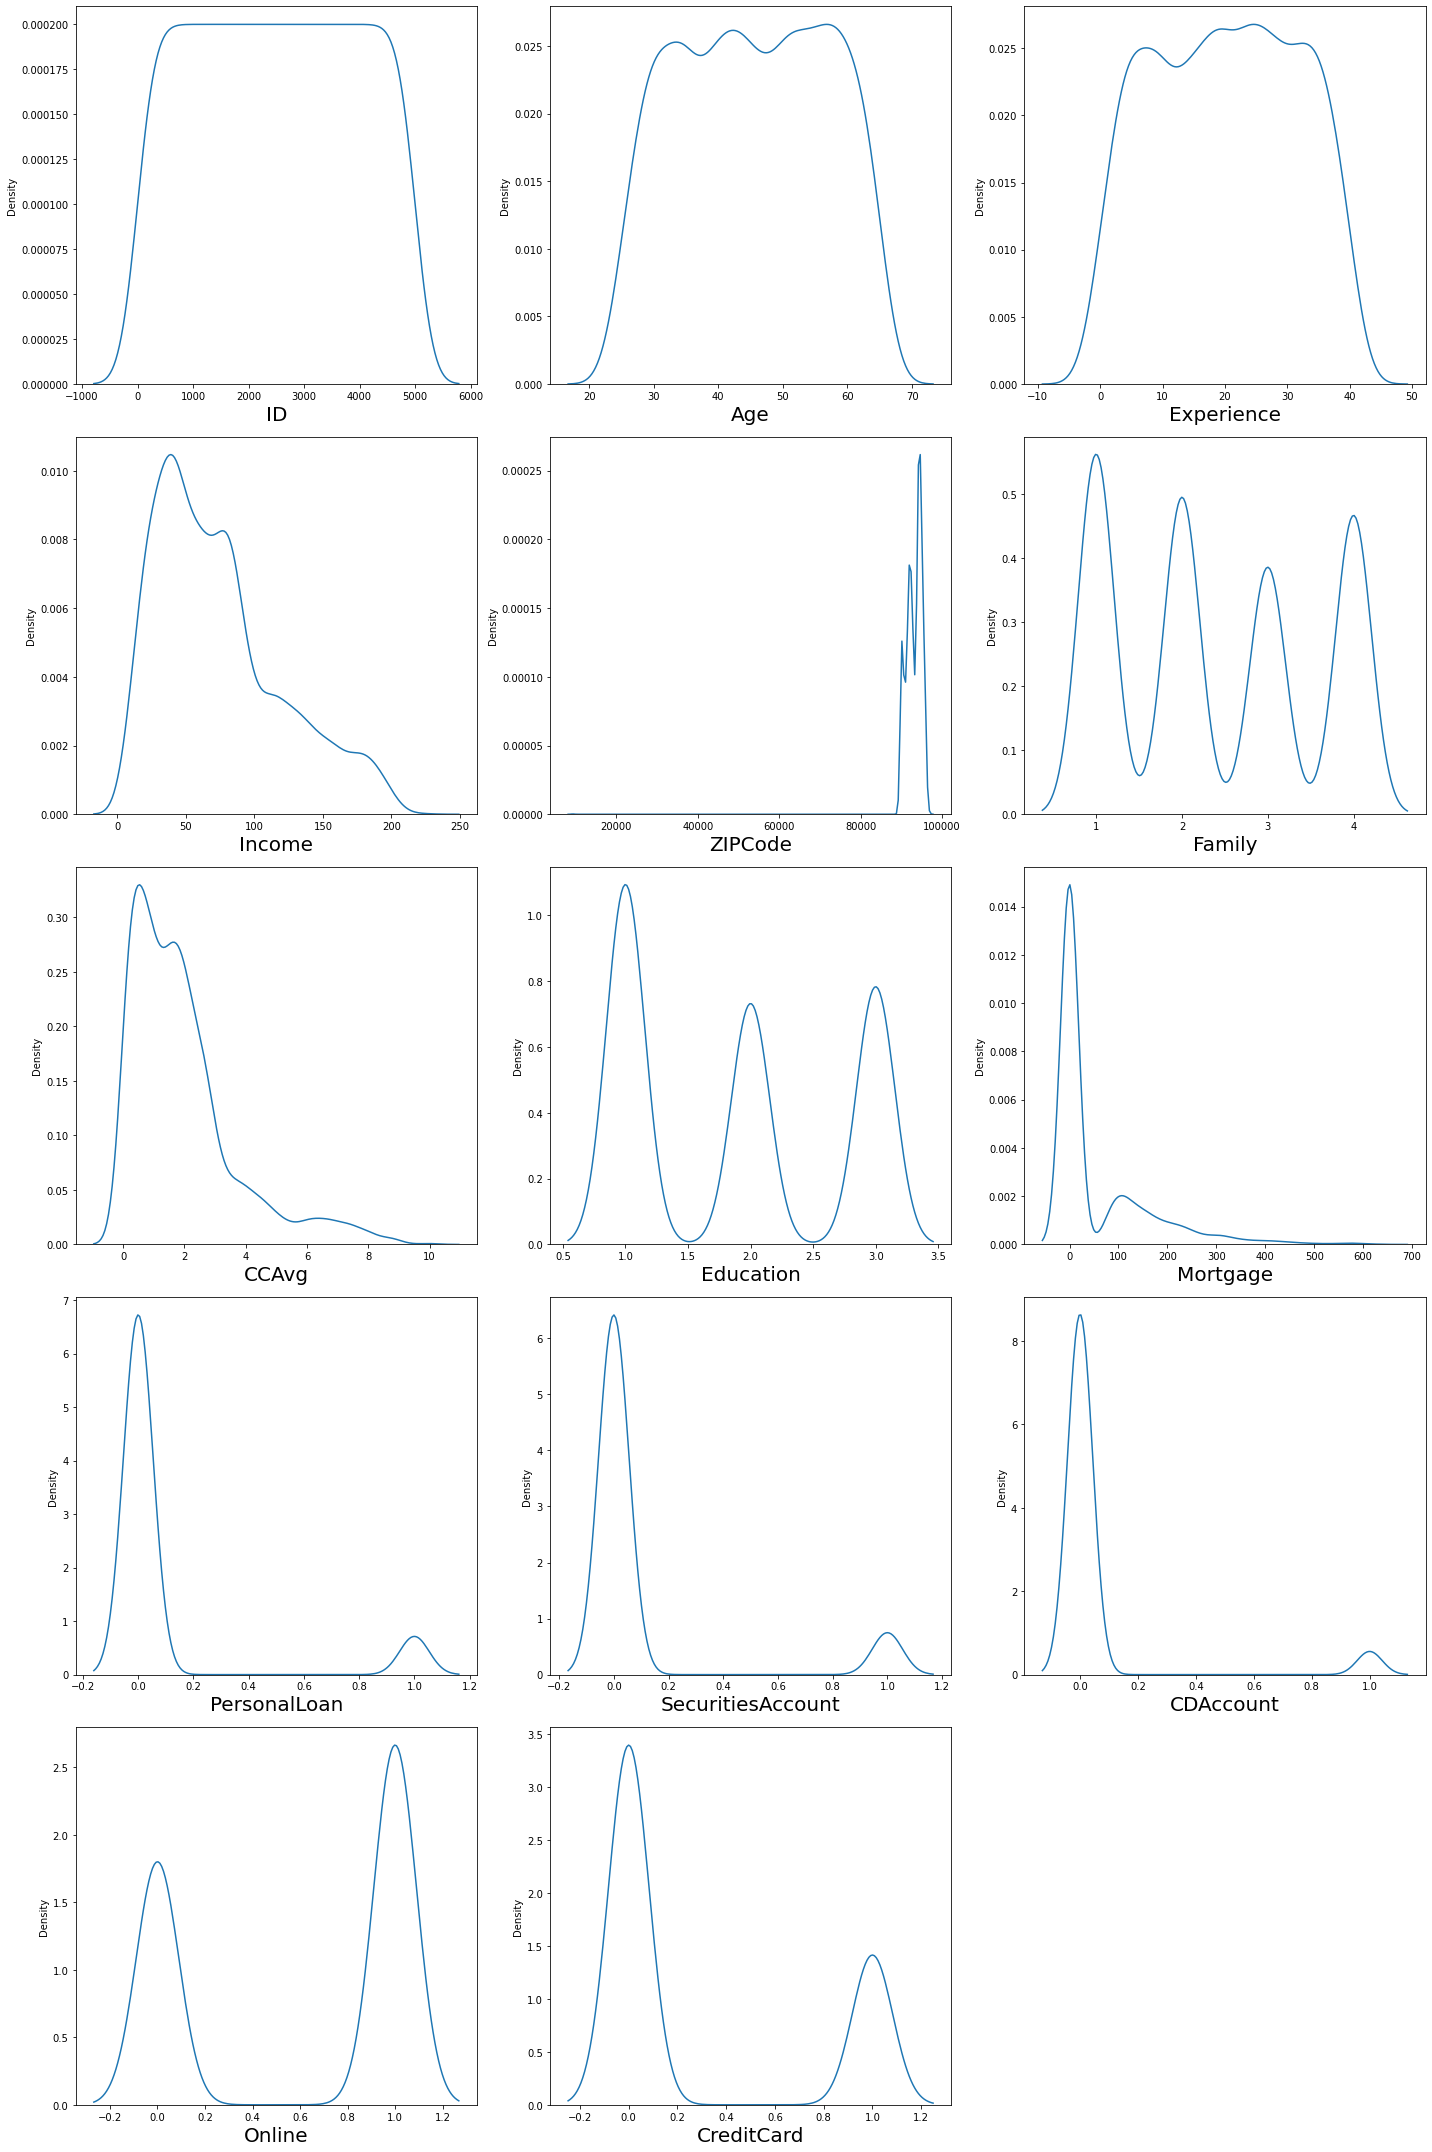

In [22]:
import matplotlib.pyplot as plt
cols = df_pd_org[['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']]


plt.figure(figsize=(20,30), facecolor = 'white')
plot = 1

for column in cols:
    if plot <= 15:
        ax = plt.subplot(5,3,plot)
        sns.kdeplot(cols[column])
        plt.xlabel(column,fontsize=20)
    
    plot = plot + 1
plt.tight_layout()

In [23]:
#Find the correlation
corr_matrix = df_pd_org.corr()
corr_matrix


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


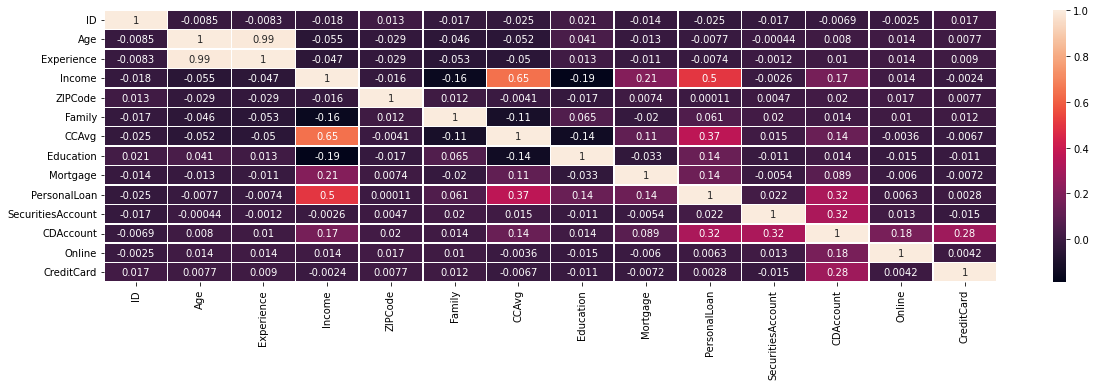

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_pd_org.corr(),annot=True,linewidths=.5)

In [25]:
 # Find how much each attribue correlates to PersonalLoan
 corr_matrix["PersonalLoan"].sort_values(ascending=False)


PersonalLoan         1.000000
Income               0.502462
CCAvg                0.366889
CDAccount            0.316355
Mortgage             0.142095
Education            0.136722
Family               0.061367
SecuritiesAccount    0.021954
Online               0.006278
CreditCard           0.002802
ZIPCode              0.000107
Experience          -0.007413
Age                 -0.007726
ID                  -0.024801
Name: PersonalLoan, dtype: float64

## Income,CCAvg,CDAccount and Mortgage play a significant role

In [26]:
df_pd.dropna(inplace=True) # vif can't be calculated with nan values
df_pd = df_pd._get_numeric_data() # drop non-numeric cols aka categorical vars




In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df_pd[['ID','Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,ID,4.009583
1,Age,1277.706913
2,Experience,315.410677
3,Income,7.862705
4,ZIPCode,368.301738
5,Family,5.686767
6,CCAvg,3.873128
7,Education,7.213509
8,Mortgage,1.377017
9,PersonalLoan,1.801703


There is some Collineraity between Age ,Experince,ZIPCode as their VIF is high.
Also, ID has no role to predict personal Loan. 

In [28]:
df['Personal_Loan_Category'] = df['PersonalLoan'].asfactor()
#df[df["Personal_Loan_Category"] ==0, "Personal_Loan_Category"] = "No"
#df[df["Personal_Loan_Category"] ==1, "Personal_Loan_Category"] = "Yes"
df["Personal_Loan_Category"] = (df["PersonalLoan"] == 1).ifelse("Yes", "No")
df.head(500)

ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan_Category
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,No
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,No
3,39,15,11,94720,1,1,1,0,0,0,0,0,0,No
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,No
5,35,8,45,91330,4,1,2,0,0,0,0,0,1,No
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,No
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,No
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,No
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,No
10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Yes


In [29]:
#Get the type of data
df.types

{'Age': 'int',
 'CCAvg': 'real',
 'CDAccount': 'int',
 'CreditCard': 'int',
 'Education': 'int',
 'Experience': 'int',
 'Family': 'int',
 'ID': 'int',
 'Income': 'int',
 'Mortgage': 'int',
 'Online': 'int',
 'PersonalLoan': 'int',
 'Personal_Loan_Category': 'enum',
 'SecuritiesAccount': 'int',
 'ZIPCode': 'int'}

In [30]:
# Get Idea of Categorical Variable
for feature in df.columns:
  if df[feature].types[feature] not in ['real','int']:


    print(f'{feature}: {df[feature].unique()}')

C1
No
Yes


Personal_Loan_Category: 


In [31]:
#Get data shape
df.shape

(5000, 15)

In [32]:
#Get stats of air data

df.describe()

Rows:5000
Cols:15




,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan_Category
type,int,int,int,int,int,int,real,int,int,int,int,int,int,int,enum
mins,1.0,23.0,-3.0,8.0,9307.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,2500.5,45.338400000000014,20.1046,73.77419999999998,93152.50299999998,2.3964000000000008,1.9379379999999997,1.881,56.498799999999974,0.096,0.1044,0.0604,0.5968,0.294,
maxs,5000.0,67.0,43.0,224.0,96651.0,4.0,10.0,3.0,635.0,1.0,1.0,1.0,1.0,1.0,
sigma,1443.5200033252052,11.463165630542667,11.467953681120555,46.03372932108631,2121.8521973362017,1.1476630455378523,1.7476589800467675,0.8398690826641989,101.71380210211204,0.29462070577617994,0.3058093260003261,0.23825027311322794,0.490589334962671,0.45563748869492826,
zeros,0,0,66,0,0,0,106,0,3462,4520,4478,4698,2016,3530,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,No
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,No
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No


In [34]:
#Check if there are any null values
df.isna().sum()

0.0

In [35]:
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [36]:
# Get the shape of the train and test
print(df_train.shape)
print(df_test.shape)

(3991, 15)
(1009, 15)


In [37]:
#Get Sample top 10 of train
df_train.head()


ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Personal_Loan_Category
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,No
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,No
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,No
5,35,8,45,91330,4,1,2,0,0,0,0,0,1,No
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,No
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,No
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,No
10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Yes
11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0,No
12,29,5,45,90277,3,0.1,2,0,0,0,0,1,0,No


In [38]:
# Features and Target
X=df.columns
print(X)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard', 'Personal_Loan_Category']


In [45]:
#Separate features and target
# Set target and predictor variables
y ='PersonalLoan'
y_category='Personal_Loan_Category'
print(X)



['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']


In [46]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=123)

In [47]:
aml.train(x=X,y=y_category,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_1_20220214_25748

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.00040009404483606453
RMSE: 0.02000235098272362
LogLoss: 0.004446915971648284
Null degrees of freedom: 3990
Residual degrees of freedom: 3985
Null deviance: 2500.82997933775
Residual deviance: 35.495283285696594
AIC: 47.495283285696594
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8501712996763982: 


,,No,Yes,Error,Rate
0,No,3613.0,0.0,0.0,(0.0/3613.0)
1,Yes,0.0,378.0,0.0,(0.0/378.0)
2,Total,3613.0,378.0,0.0,(0.0/3991.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.850171,1.000000,139.0
1,max f2,0.850171,1.000000,139.0
2,max f0point5,0.850171,1.000000,139.0
3,max accuracy,0.850171,1.000000,139.0
4,max precision,0.999973,1.000000,0.0
5,max recall,0.850171,1.000000,139.0
6,max specificity,0.999973,1.000000,0.0
7,max absolute_mcc,0.850171,1.000000,139.0
8,max min_per_class_accuracy,0.850171,1.000000,139.0
9,max mean_per_class_accuracy,0.850171,1.000000,139.0



Gains/Lift Table: Avg response rate:  9.47 %, avg score:  9.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,0.999972,10.558201,10.558201,1.00,0.999978,1.000000,0.999978,0.105820,0.105820,955.820106,955.820106,0.105820
1,2,0.020045,0.999948,10.558201,10.558201,1.00,0.999962,1.000000,0.999970,0.105820,0.211640,955.820106,955.820106,0.211640
2,3,0.030068,0.998855,10.558201,10.558201,1.00,0.999353,1.000000,0.999765,0.105820,0.317460,955.820106,955.820106,0.317460
3,4,0.040090,0.998238,10.558201,10.558201,1.00,0.998538,1.000000,0.999458,0.105820,0.423280,955.820106,955.820106,0.423280
4,5,0.050113,0.997587,10.558201,10.558201,1.00,0.997926,1.000000,0.999152,0.105820,0.529101,955.820106,955.820106,0.529101
5,6,0.100226,0.132647,9.396799,9.977500,0.89,0.892553,0.945000,0.945852,0.470899,1.000000,839.679894,897.750000,0.993911
6,7,0.150088,0.005870,0.000000,6.662771,0.00,0.040380,0.631052,0.645036,0.000000,1.000000,-100.000000,566.277129,0.938832
7,8,0.200200,0.001258,0.000000,4.994994,0.00,0.003079,0.473091,0.484346,0.000000,1.000000,-100.000000,399.499374,0.883476
8,9,0.300175,0.000118,0.000000,3.331386,0.00,0.000351,0.315526,0.323149,0.000000,1.000000,-100.000000,233.138564,0.773042
9,10,0.400150,0.000052,0.000000,2.499061,0.00,0.000072,0.236694,0.242430,0.000000,1.000000,-100.000000,149.906074,0.662607




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.009987998742095648
RMSE: 0.09993997569589283
LogLoss: 0.03312546684548296
Null degrees of freedom: 3990
Residual degrees of freedom: 3984
Null deviance: 2504.142438517927
Residual deviance: 264.407476360645
AIC: 278.407476360645
AUC: 0.9979142778063342
AUCPR: 0.9834632814900284
Gini: 0.9958285556126685

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3673665900708565: 


,,No,Yes,Error,Rate
0,No,3585.0,28.0,0.0077,(28.0/3613.0)
1,Yes,23.0,355.0,0.0608,(23.0/378.0)
2,Total,3608.0,383.0,0.0128,(51.0/3991.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.367367,0.932983,167.0
1,max f2,0.166601,0.941692,205.0
2,max f0point5,0.853516,0.962002,107.0
3,max accuracy,0.367367,0.987221,167.0
4,max precision,0.999978,1.000000,0.0
5,max recall,0.013451,1.000000,328.0
6,max specificity,0.999978,1.000000,0.0
7,max absolute_mcc,0.367367,0.925945,167.0
8,max min_per_class_accuracy,0.104855,0.976190,231.0
9,max mean_per_class_accuracy,0.097670,0.978424,236.0



Gains/Lift Table: Avg response rate:  9.47 %, avg score:  9.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,0.999810,10.558201,10.558201,1.000000,0.999936,1.000000,0.999936,0.105820,0.105820,955.820106,955.820106,0.105820
1,2,0.020045,0.998093,10.558201,10.558201,1.000000,0.998965,1.000000,0.999451,0.105820,0.211640,955.820106,955.820106,0.211640
2,3,0.030068,0.996752,10.558201,10.558201,1.000000,0.997467,1.000000,0.998789,0.105820,0.317460,955.820106,955.820106,0.317460
3,4,0.040090,0.994712,10.558201,10.558201,1.000000,0.995747,1.000000,0.998029,0.105820,0.423280,955.820106,955.820106,0.423280
4,5,0.050113,0.992006,10.558201,10.558201,1.000000,0.993421,1.000000,0.997107,0.105820,0.529101,955.820106,955.820106,0.529101
5,6,0.100226,0.260358,8.340979,9.449590,0.790000,0.803788,0.895000,0.900448,0.417989,0.947090,734.097884,844.958995,0.935465
6,7,0.150088,0.018156,0.955013,6.627519,0.090452,0.082173,0.627713,0.628600,0.047619,0.994709,-4.498684,562.751853,0.932987
7,8,0.200200,0.004715,0.105582,4.994994,0.010000,0.008105,0.473091,0.473282,0.005291,1.000000,-89.441799,399.499374,0.883476
8,9,0.300175,0.000452,0.000000,3.331386,0.000000,0.002079,0.315526,0.316346,0.000000,1.000000,-100.000000,233.138564,0.773042
9,10,0.400150,0.000105,0.000000,2.499061,0.000000,0.000194,0.236694,0.237357,0.000000,1.000000,-100.000000,149.906074,0.662607


In [48]:
aml.leaderboard.as_data_frame()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_3_AutoML_1_20220214_25748,0.997914,0.033125,0.983463,0.034298,0.099940,0.009988
1,StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_25748,0.997773,0.034072,0.982148,0.041958,0.102156,0.010436
2,GBM_grid_1_AutoML_1_20220214_25748_model_1,0.997753,0.035385,0.981826,0.042096,0.103842,0.010783
3,StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_25748,0.997572,0.035545,0.981333,0.051294,0.102503,0.010507
4,StackedEnsemble_BestOfFamily_3_AutoML_1_20220214_25748,0.997544,0.034652,0.981968,0.048234,0.099492,0.009899
5,GBM_grid_1_AutoML_1_20220214_25748_model_3,0.997536,0.038267,0.979911,0.064107,0.108137,0.011694
6,StackedEnsemble_AllModels_2_AutoML_1_20220214_25748,0.997400,0.035428,0.981117,0.039312,0.101222,0.010246
7,GBM_5_AutoML_1_20220214_25748,0.997379,0.040394,0.981456,0.048095,0.102306,0.010467
8,GBM_3_AutoML_1_20220214_25748,0.997327,0.040085,0.980295,0.048156,0.106503,0.011343
9,StackedEnsemble_AllModels_1_AutoML_1_20220214_25748,0.997325,0.035995,0.980835,0.037774,0.102814,0.010571


In [49]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20220214_25748,0.997914,0.0331255,0.983463,0.0342982,0.09994,0.009988
StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_25748,0.997773,0.0340722,0.982148,0.0419579,0.102156,0.0104359
GBM_grid_1_AutoML_1_20220214_25748_model_1,0.997753,0.0353852,0.981826,0.0420963,0.103842,0.0107832
StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_25748,0.997572,0.0355455,0.981333,0.0512944,0.102503,0.0105069
StackedEnsemble_BestOfFamily_3_AutoML_1_20220214_25748,0.997544,0.0346523,0.981968,0.0482337,0.0994919,0.00989863
GBM_grid_1_AutoML_1_20220214_25748_model_3,0.997536,0.0382668,0.979911,0.0641068,0.108137,0.0116936
StackedEnsemble_AllModels_2_AutoML_1_20220214_25748,0.9974,0.0354284,0.981117,0.0393124,0.101222,0.010246
GBM_5_AutoML_1_20220214_25748,0.997379,0.0403945,0.981456,0.0480954,0.102306,0.0104665
GBM_3_AutoML_1_20220214_25748,0.997327,0.0400852,0.980295,0.0481565,0.106503,0.0113428
StackedEnsemble_AllModels_1_AutoML_1_20220214_25748,0.997325,0.0359946,0.980835,0.037774,0.102814,0.0105706


GBM is best performing Model here.

In [50]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_1_20220214_25748_model_1': 2,
 'GLM_1_AutoML_1_20220214_25748': 33,
 'StackedEnsemble_AllModels_3_AutoML_1_20220214_25748': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_25748': 1}

In [52]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [53]:
best_model.algo

'gbm'

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

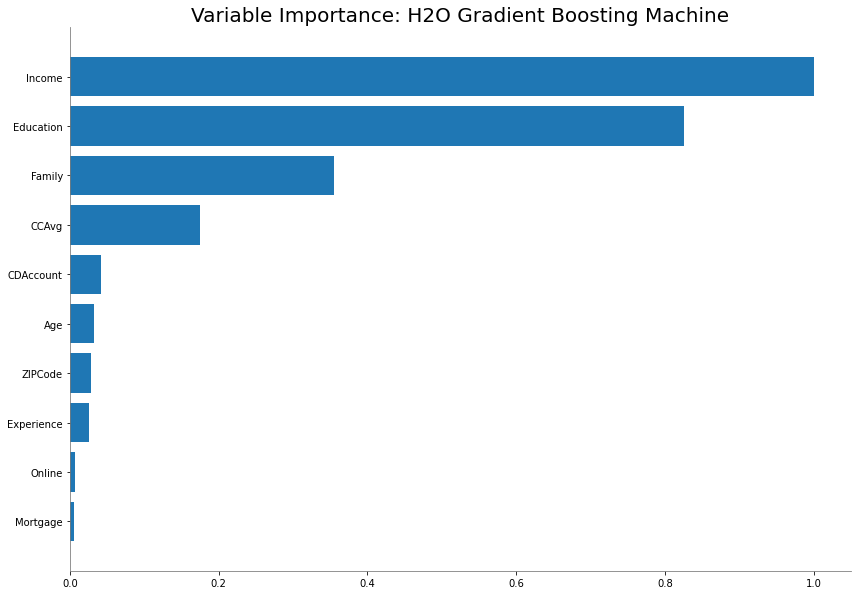

<Figure size 432x288 with 0 Axes>

In [55]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Income,Education,Family are the most important variables according to GBM.

33
glm


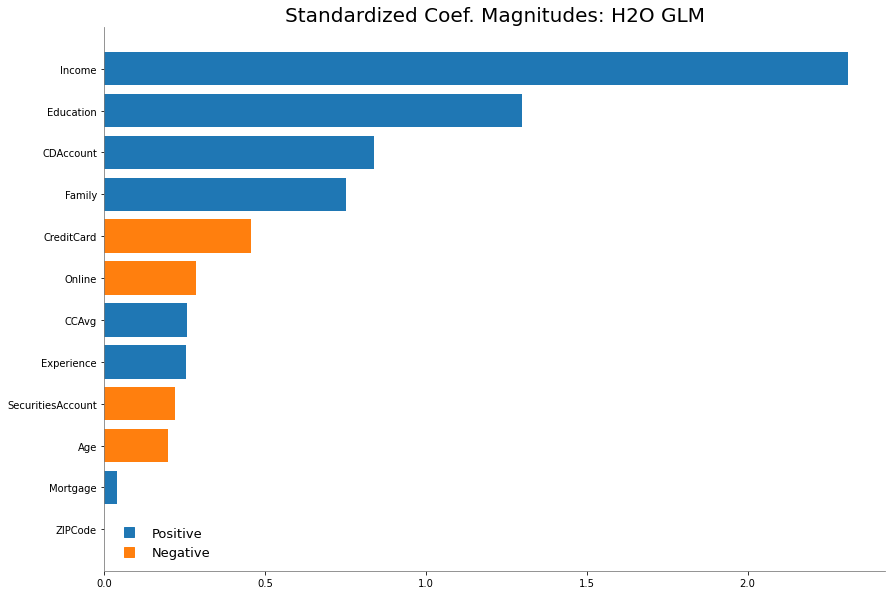

In [56]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

H20 GLM also predicts Income as the most important variable followed by CD Account and Education.

In [57]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [58]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.9991568843634477,
 'gini': 0.9983137687268955,
 'logloss': 0.02064452262242905,
 'mse': 0.005892748799616168,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.07676424167290502}

Test data auc is 0.99

In [59]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [60]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict,No,Yes
0,No,0.999900,0.000100
1,No,0.999900,0.000100
2,Yes,0.001336,0.998664
3,No,0.999904,0.000096
4,No,0.999900,0.000100


In [61]:
y_test=h2o.as_list(df_test[y_category])
y_test[0:5]

,Personal_Loan_Category
0,No
1,No
2,Yes
3,No
4,No


In [62]:
print(X)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'ID'.


/usr/local/lib/python3.7/dist-packages/h2o/model/model_base.py:1321: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


,id,mean_response,stddev_response,std_error_mean_response
0,1.000000,0.096234,0.285511,0.004038
1,264.105263,0.096234,0.285511,0.004038
2,527.210526,0.096234,0.285511,0.004038
3,790.315789,0.096234,0.285511,0.004038
4,1053.421053,0.096234,0.285511,0.004038
5,1316.526316,0.096234,0.285511,0.004038
6,1579.631579,0.096234,0.285511,0.004038
7,1842.736842,0.096234,0.285511,0.004038
8,2105.842105,0.096234,0.285511,0.004038
9,2368.947368,0.096234,0.285511,0.004038



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Age'.


,age,mean_response,stddev_response,std_error_mean_response
0,23.000000,0.099101,0.285292,0.004035
1,25.315789,0.099101,0.285292,0.004035
2,27.631579,0.098627,0.285333,0.004035
3,29.947368,0.097296,0.284256,0.004020
4,32.263158,0.097270,0.284326,0.004021
5,34.578947,0.096754,0.284042,0.004017
6,36.894737,0.096880,0.284194,0.004019
7,39.210526,0.096023,0.283593,0.004011
8,41.526316,0.096486,0.284332,0.004021
9,43.842105,0.097595,0.285368,0.004036



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Experience'.


,experience,mean_response,stddev_response,std_error_mean_response
0,-3.000000,0.095442,0.282464,0.003995
1,-0.578947,0.095442,0.282464,0.003995
2,1.842105,0.095601,0.282605,0.003997
3,4.263158,0.096694,0.284108,0.004018
4,6.684211,0.096810,0.284132,0.004018
5,9.105263,0.095570,0.282921,0.004001
6,11.526316,0.095903,0.283273,0.004006
7,13.947368,0.095274,0.282657,0.003997
8,16.368421,0.095944,0.283406,0.004008
9,18.789474,0.095914,0.283714,0.004012



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Income'.


,income,mean_response,stddev_response,std_error_mean_response
0,8.000000,0.016181,0.086630,0.001225
1,19.368421,0.016181,0.086630,0.001225
2,30.736842,0.016181,0.086630,0.001225
3,42.105263,0.016181,0.086630,0.001225
4,53.473684,0.016672,0.088651,0.001254
5,64.842105,0.017089,0.090769,0.001284
6,76.210526,0.018288,0.093097,0.001317
7,87.578947,0.035099,0.135779,0.001920
8,98.947368,0.078967,0.218145,0.003085
9,110.315789,0.203535,0.266171,0.003764



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'ZIPCode'.


,zipcode,mean_response,stddev_response,std_error_mean_response
0,9307.000000,0.095722,0.281983,0.003988
1,13904.052632,0.095722,0.281983,0.003988
2,18501.105263,0.095722,0.281983,0.003988
3,23098.157895,0.095722,0.281983,0.003988
4,27695.210526,0.095722,0.281983,0.003988
5,32292.263158,0.095722,0.281983,0.003988
6,36889.315789,0.095722,0.281983,0.003988
7,41486.368421,0.095722,0.281983,0.003988
8,46083.421053,0.095722,0.281983,0.003988
9,50680.473684,0.095722,0.281983,0.003988



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Family'.


,family,mean_response,stddev_response,std_error_mean_response
0,1.0,0.078471,0.257458,0.003641
1,2.0,0.081299,0.260688,0.003687
2,3.0,0.211914,0.395195,0.005589
3,4.0,0.220020,0.401170,0.005673



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'CCAvg'.


,ccavg,mean_response,stddev_response,std_error_mean_response
0,0.000000,0.079474,0.264350,0.003738
1,0.526316,0.081620,0.267647,0.003785
2,1.052632,0.081073,0.267224,0.003779
3,1.578947,0.082443,0.269047,0.003805
4,2.105263,0.081602,0.267996,0.003790
5,2.631579,0.085083,0.271842,0.003844
6,3.157895,0.181090,0.302614,0.004280
7,3.684211,0.199315,0.323366,0.004573
8,4.210526,0.147696,0.305479,0.004320
9,4.736842,0.113764,0.289709,0.004097



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Education'.


,education,mean_response,stddev_response,std_error_mean_response
0,1.0,0.057714,0.220270,0.003115
1,2.0,0.213365,0.397438,0.005621
2,3.0,0.212490,0.397141,0.005616



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Mortgage'.


,mortgage,mean_response,stddev_response,std_error_mean_response
0,0.000000,0.096152,0.284930,0.004030
1,33.421053,0.096152,0.284930,0.004030
2,66.842105,0.095686,0.284381,0.004022
3,100.263158,0.095710,0.284418,0.004022
4,133.684211,0.096463,0.285004,0.004031
5,167.105263,0.094748,0.282926,0.004001
6,200.526316,0.094346,0.282407,0.003994
7,233.947368,0.095959,0.283467,0.004009
8,267.368421,0.095893,0.283337,0.004007
9,300.789474,0.096023,0.283381,0.004008



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'SecuritiesAccount'.


,securitiesaccount,mean_response,stddev_response,std_error_mean_response
0,0.0,0.096472,0.285598,0.004039
1,1.0,0.092864,0.280374,0.003965



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'CDAccount'.


,cdaccount,mean_response,stddev_response,std_error_mean_response
0,0.0,0.093560,0.281067,0.003975
1,1.0,0.127969,0.313616,0.004435



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'Online'.


,online,mean_response,stddev_response,std_error_mean_response
0,0.0,0.097309,0.285875,0.004043
1,1.0,0.095000,0.283263,0.004006



PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_1_20220214_25748_model_1 on column 'CreditCard'.


,creditcard,mean_response,stddev_response,std_error_mean_response
0,0.0,0.096751,0.285798,0.004042
1,1.0,0.095411,0.283980,0.004016


[, , , , , , , , , , , , ]

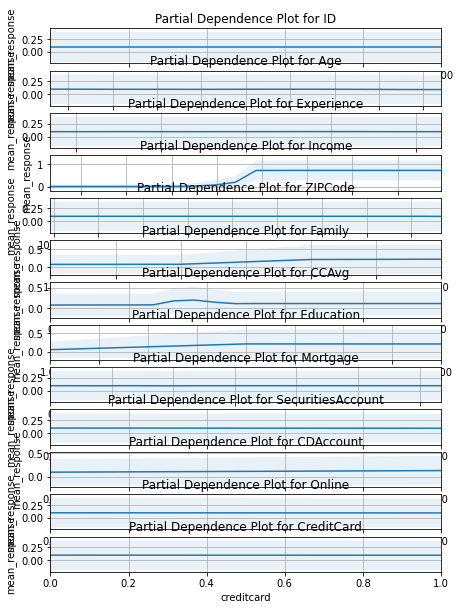

In [63]:
best_model.partial_plot(df, cols=['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'])

Age has a big impact on loan prediction according to partial plot

**Lets train our model again only on GBM**

In [64]:
aml2 = H2OAutoML(max_runtime_secs=run_time, seed=123,include_algos = ["gbm"])

In [65]:
aml2.train(x=X,y=y_category,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_2_20220214_31249


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,94.0,94.0,83925.0,8.0,8.0,8.0,41.0,118.0,66.276596




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 7.167326813487962e-05
RMSE: 0.00846600662265744
LogLoss: 0.0019813260121348186
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8659471481525651: 


,,No,Yes,Error,Rate
0,No,3613.0,0.0,0.0,(0.0/3613.0)
1,Yes,0.0,378.0,0.0,(0.0/378.0)
2,Total,3613.0,378.0,0.0,(0.0/3991.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.865947,1.000000,167.0
1,max f2,0.865947,1.000000,167.0
2,max f0point5,0.865947,1.000000,167.0
3,max accuracy,0.865947,1.000000,167.0
4,max precision,0.999896,1.000000,0.0
5,max recall,0.865947,1.000000,167.0
6,max specificity,0.999896,1.000000,0.0
7,max absolute_mcc,0.865947,1.000000,167.0
8,max min_per_class_accuracy,0.865947,1.000000,167.0
9,max mean_per_class_accuracy,0.865947,1.000000,167.0



Gains/Lift Table: Avg response rate:  9.47 %, avg score:  9.47 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,0.999690,10.558201,10.558201,1.00,0.999809,1.000000,0.999809,0.105820,0.105820,955.820106,955.820106,0.105820
1,2,0.020045,0.999369,10.558201,10.558201,1.00,0.999555,1.000000,0.999682,0.105820,0.211640,955.820106,955.820106,0.211640
2,3,0.030068,0.998973,10.558201,10.558201,1.00,0.999197,1.000000,0.999520,0.105820,0.317460,955.820106,955.820106,0.317460
3,4,0.040090,0.998414,10.558201,10.558201,1.00,0.998700,1.000000,0.999315,0.105820,0.423280,955.820106,955.820106,0.423280
4,5,0.050113,0.997549,10.558201,10.558201,1.00,0.998079,1.000000,0.999068,0.105820,0.529101,955.820106,955.820106,0.529101
5,6,0.100226,0.034894,9.396799,9.977500,0.89,0.876138,0.945000,0.937603,0.470899,1.000000,839.679894,897.750000,0.993911
6,7,0.150088,0.002063,0.000000,6.662771,0.00,0.010496,0.631052,0.629599,0.000000,1.000000,-100.000000,566.277129,0.938832
7,8,0.200200,0.000741,0.000000,4.994994,0.00,0.001179,0.473091,0.472298,0.000000,1.000000,-100.000000,399.499374,0.883476
8,9,0.300175,0.000267,0.000000,3.331386,0.00,0.000448,0.315526,0.315146,0.000000,1.000000,-100.000000,233.138564,0.773042
9,10,0.400150,0.000153,0.000000,2.499061,0.00,0.000196,0.236694,0.236458,0.000000,1.000000,-100.000000,149.906074,0.662607




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.010823828358474546
RMSE: 0.104037629531216
LogLoss: 0.037963302285331256
Mean Per-Class Error: 0.04049676579430247
AUC: 0.9978172589575856
AUCPR: 0.9829573524108678
Gini: 0.9956345179151711

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21210379692407602: 


,,No,Yes,Error,Rate
0,No,3588.0,25.0,0.0069,(25.0/3613.0)
1,Yes,28.0,350.0,0.0741,(28.0/378.0)
2,Total,3616.0,375.0,0.0133,(53.0/3991.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.212104,0.929615,194.0
1,max f2,0.054123,0.940874,247.0
2,max f0point5,0.760478,0.958987,141.0
3,max accuracy,0.302238,0.986720,182.0
4,max precision,0.999896,1.000000,0.0
5,max recall,0.001654,1.000000,359.0
6,max specificity,0.999896,1.000000,0.0
7,max absolute_mcc,0.212104,0.922292,194.0
8,max min_per_class_accuracy,0.039079,0.976190,261.0
9,max mean_per_class_accuracy,0.029239,0.977455,272.0



Gains/Lift Table: Avg response rate:  9.47 %, avg score:  8.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,0.999574,10.558201,10.558201,1.000000,0.999778,1.000000,0.999778,0.105820,0.105820,955.820106,955.820106,0.105820
1,2,0.020045,0.999256,10.558201,10.558201,1.000000,0.999414,1.000000,0.999596,0.105820,0.211640,955.820106,955.820106,0.211640
2,3,0.030068,0.998294,10.558201,10.558201,1.000000,0.998772,1.000000,0.999321,0.105820,0.317460,955.820106,955.820106,0.317460
3,4,0.040090,0.996645,10.558201,10.558201,1.000000,0.997586,1.000000,0.998888,0.105820,0.423280,955.820106,955.820106,0.423280
4,5,0.050113,0.992522,10.558201,10.558201,1.000000,0.994947,1.000000,0.998099,0.105820,0.529101,955.820106,955.820106,0.529101
5,6,0.100226,0.107313,8.235397,9.396799,0.780000,0.718835,0.890000,0.858467,0.412698,0.941799,723.539683,839.679894,0.929621
6,7,0.150088,0.003984,1.061126,6.627519,0.100503,0.027237,0.627713,0.582316,0.052910,0.994709,6.112573,562.751853,0.932987
7,8,0.200200,0.000979,0.105582,4.994994,0.010000,0.001869,0.473091,0.437022,0.005291,1.000000,-89.441799,399.499374,0.883476
8,9,0.300175,0.000320,0.000000,3.331386,0.000000,0.000568,0.315526,0.291659,0.000000,1.000000,-100.000000,233.138564,0.773042
9,10,0.400150,0.000189,0.000000,2.499061,0.000000,0.000244,0.236694,0.218851,0.000000,1.000000,-100.000000,149.906074,0.662607




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.988976,0.003116,0.986233,0.988722,0.989975,0.993734,0.986216
1,auc,0.997761,0.001337,0.996105,0.996958,0.999027,0.999208,0.997509
2,err,0.011024,0.003116,0.013767,0.011278,0.010025,0.006266,0.013784
3,err_count,8.800000,2.489980,11.000000,9.000000,8.000000,5.000000,11.000000
4,f0point5,0.950225,0.030284,0.948718,0.949721,0.962060,0.987013,0.903614
5,f1,0.939920,0.019366,0.930818,0.937931,0.946667,0.968153,0.916030
6,f2,0.930112,0.013104,0.913580,0.926431,0.931759,0.950000,0.928793
7,lift_top_group,10.642385,1.102896,9.743902,10.783784,10.363636,9.851851,12.468750
8,logloss,0.039141,0.012288,0.054707,0.042947,0.034535,0.021343,0.042176
9,max_per_class_error,0.076159,0.014834,0.097561,0.081081,0.077922,0.061728,0.062500



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 03:13:22,7.641 sec,0.0,0.292818,0.313309,0.500000,0.094713,1.000000,0.905287
1,,2022-02-14 03:13:22,7.695 sec,5.0,0.197880,0.153189,0.997880,0.982982,10.558201,0.013029
2,,2022-02-14 03:13:22,7.760 sec,10.0,0.156029,0.108291,0.998742,0.990140,10.558201,0.009521
3,,2022-02-14 03:13:22,7.824 sec,15.0,0.120181,0.074345,0.999641,0.996721,10.558201,0.005262
4,,2022-02-14 03:13:22,7.888 sec,20.0,0.100508,0.055843,0.999761,0.997813,10.558201,0.004510
5,,2022-02-14 03:13:22,7.956 sec,25.0,0.078353,0.039385,0.999955,0.999576,10.558201,0.001503
6,,2022-02-14 03:13:23,8.048 sec,30.0,0.065999,0.030138,0.999985,0.999861,10.558201,0.001253
7,,2022-02-14 03:13:23,8.116 sec,35.0,0.055600,0.022857,0.999996,0.999958,10.558201,0.000251
8,,2022-02-14 03:13:23,8.183 sec,40.0,0.047395,0.018102,0.999998,0.999979,10.558201,0.000251
9,,2022-02-14 03:13:23,8.249 sec,45.0,0.040348,0.014023,0.999999,0.999993,10.558201,0.000251



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Income,384.751129,1.000000,0.282498
1,Education,346.144836,0.899659,0.254152
2,CCAvg,271.076416,0.704550,0.199034
3,Family,159.895630,0.415582,0.117401
4,CDAccount,71.759201,0.186508,0.052688
5,Age,44.762791,0.116342,0.032866
6,Experience,31.727051,0.082461,0.023295
7,ZIPCode,19.008125,0.049404,0.013956
8,Mortgage,18.348770,0.047690,0.013472
9,Online,7.331011,0.019054,0.005383


Accuracy is high on cross validated data but the recall and F1 is less.Next is we can tune hyperparameters and include regularization and test

### HYPERPARAMETERS TUNING 

In [66]:
train_df, valid_df, test_df = df.split_frame(ratios=[0.6,0.2], seed=2018)

In [67]:
#target = "y_category"
target='y_category'
train_df[target] = train_df[y_category]
valid_df[target] = valid_df[y_category]
test_df[target] = test_df[y_category]
print("Number of rows in train, valid and test set : ", train_df.shape[0], valid_df.shape[0], test_df.shape[0])

Number of rows in train, valid and test set :  3010 1004 986


In [68]:
train_df[target]

y_category
No
No
No
No
No
No
No
No
No
No


In [69]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = [ 'ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']
# initialize the H2O GBM 
gbm = H2OGradientBoostingEstimator()
# train with the initialized model
gbm.train(x=predictors, y=target, training_frame=train_df)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644805979406_10806


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,16561.0,5.0,5.0,5.0,15.0,28.0,21.68




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0021141761238998294
RMSE: 0.04598017098597861
LogLoss: 0.01199148404250134
Mean Per-Class Error: 0.001694915254237288
AUC: 0.9999975028872866
AUCPR: 0.9999771343425177
Gini: 0.9999950057745732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38304218751697205: 


,,No,Yes,Error,Rate
0,No,2715.0,0.0,0.0,(0.0/2715.0)
1,Yes,1.0,294.0,0.0034,(1.0/295.0)
2,Total,2716.0,294.0,0.0003,(1.0/3010.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.383042,0.998302,166.0
1,max f2,0.336609,0.998646,169.0
2,max f0point5,0.383042,0.999320,166.0
3,max accuracy,0.383042,0.999668,166.0
4,max precision,0.996826,1.000000,0.0
5,max recall,0.336609,1.000000,169.0
6,max specificity,0.996826,1.000000,0.0
7,max absolute_mcc,0.383042,0.998120,166.0
8,max min_per_class_accuracy,0.336609,0.999263,169.0
9,max mean_per_class_accuracy,0.336609,0.999632,169.0



Gains/Lift Table: Avg response rate:  9.80 %, avg score:  9.81 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010631,0.993644,10.203390,10.203390,1.00,0.994392,1.000000,0.994392,0.108475,0.108475,920.338983,920.338983,0.108475
1,2,0.020266,0.992567,10.203390,10.203390,1.00,0.993066,1.000000,0.993761,0.098305,0.206780,920.338983,920.338983,0.206780
2,3,0.030233,0.991778,10.203390,10.203390,1.00,0.992148,1.000000,0.993230,0.101695,0.308475,920.338983,920.338983,0.308475
3,4,0.040199,0.990462,10.203390,10.203390,1.00,0.991072,1.000000,0.992695,0.101695,0.410169,920.338983,920.338983,0.410169
4,5,0.050166,0.989719,10.203390,10.203390,1.00,0.989970,1.000000,0.992153,0.101695,0.511864,920.338983,920.338983,0.511864
5,6,0.100000,0.248365,9.795254,10.000000,0.96,0.875452,0.980066,0.933997,0.488136,1.000000,879.525424,900.000000,0.997790
6,7,0.150166,0.012012,0.000000,6.659292,0.00,0.071873,0.652655,0.645986,0.000000,1.000000,-100.000000,565.929204,0.942173
7,8,0.200000,0.001733,0.000000,5.000000,0.00,0.004170,0.490033,0.486065,0.000000,1.000000,-100.000000,400.000000,0.886924
8,9,0.398007,0.001143,0.000000,2.512521,0.00,0.001248,0.246244,0.244870,0.000000,1.000000,-100.000000,151.252087,0.667403
9,10,0.694020,0.001143,0.000000,1.440881,0.00,0.001143,0.141216,0.140916,0.000000,1.000000,-100.000000,44.088080,0.339227




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 03:20:27,0.017 sec,0.0,0.297324,0.320681,0.500000,0.098007,1.00000,0.901993
1,,2022-02-14 03:20:27,0.042 sec,1.0,0.260476,0.237543,0.997958,0.983954,10.20339,0.013953
2,,2022-02-14 03:20:27,0.060 sec,2.0,0.236323,0.201454,0.998210,0.985351,10.20339,0.013953
3,,2022-02-14 03:20:27,0.079 sec,3.0,0.215444,0.174997,0.998681,0.989215,10.20339,0.011960
4,,2022-02-14 03:20:27,0.100 sec,4.0,0.197552,0.154629,0.998813,0.990349,10.20339,0.011296
5,,2022-02-14 03:20:27,0.120 sec,5.0,0.182354,0.138469,0.998819,0.990292,10.20339,0.010631
6,,2022-02-14 03:20:27,0.141 sec,6.0,0.168828,0.124678,0.998883,0.990859,10.20339,0.010631
7,,2022-02-14 03:20:27,0.161 sec,7.0,0.157351,0.113292,0.998894,0.990973,10.20339,0.010299
8,,2022-02-14 03:20:27,0.191 sec,8.0,0.147307,0.103433,0.998878,0.990762,10.20339,0.009967
9,,2022-02-14 03:20:27,0.213 sec,9.0,0.137728,0.094171,0.999060,0.992116,10.20339,0.009302



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Income,470.938629,1.000000,0.387939
1,Education,437.246155,0.928457,0.360185
2,Family,158.167984,0.335857,0.130292
3,CCAvg,80.751236,0.171469,0.066519
4,CDAccount,15.993560,0.033961,0.013175
5,ID,15.815872,0.033584,0.013028
6,Experience,15.278510,0.032443,0.012586
7,Age,6.227172,0.013223,0.005130
8,ZIPCode,4.561513,0.009686,0.003758
9,Online,4.136389,0.008783,0.003407


In [70]:
gbm.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,16561.0,5.0,5.0,5.0,15.0,28.0,21.68


In [71]:
print(gbm.model_performance(test_df))


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.00671295650273187
RMSE: 0.0819326339301494
LogLoss: 0.026286728503761344
Mean Per-Class Error: 0.026595744680851064
AUC: 0.9985092071367236
AUCPR: 0.9901447228168484
Gini: 0.9970184142734473

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.759832037378863: 


,,No,Yes,Error,Rate
0,No,892.0,0.0,0.0,(0.0/892.0)
1,Yes,5.0,89.0,0.0532,(5.0/94.0)
2,Total,897.0,89.0,0.0051,(5.0/986.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.759832,0.972678,77.0
1,max f2,0.600810,0.968085,82.0
2,max f0point5,0.759832,0.988889,77.0
3,max accuracy,0.759832,0.994929,77.0
4,max precision,0.996146,1.000000,0.0
5,max recall,0.029728,1.000000,135.0
6,max specificity,0.996146,1.000000,0.0
7,max absolute_mcc,0.759832,0.970325,77.0
8,max min_per_class_accuracy,0.214165,0.978723,98.0
9,max mean_per_class_accuracy,0.600810,0.982361,82.0



Gains/Lift Table: Avg response rate:  9.53 %, avg score: 10.18 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010142,0.993663,10.489362,10.489362,1.000000,0.994327,1.000000,0.994327,0.106383,0.106383,948.936170,948.936170,0.106383
1,2,0.020284,0.992861,10.489362,10.489362,1.000000,0.993305,1.000000,0.993816,0.106383,0.212766,948.936170,948.936170,0.212766
2,3,0.031440,0.991901,10.489362,10.489362,1.000000,0.992199,1.000000,0.993242,0.117021,0.329787,948.936170,948.936170,0.329787
3,4,0.040568,0.990919,10.489362,10.489362,1.000000,0.991299,1.000000,0.992805,0.095745,0.425532,948.936170,948.936170,0.425532
4,5,0.050710,0.989801,10.489362,10.489362,1.000000,0.990236,1.000000,0.992291,0.106383,0.531915,948.936170,948.936170,0.531915
5,6,0.100406,0.347560,8.776813,9.641737,0.836735,0.877061,0.919192,0.935258,0.436170,0.968085,777.681285,864.173651,0.959116
6,7,0.150101,0.023283,0.642206,6.662162,0.061224,0.131537,0.635135,0.669161,0.031915,1.000000,-35.779418,566.216216,0.939462
7,8,0.200811,0.002641,0.000000,4.979798,0.000000,0.009261,0.474747,0.502520,0.000000,1.000000,-100.000000,397.979798,0.883408
8,9,0.300203,0.001165,0.000000,3.331081,0.000000,0.001478,0.317568,0.336634,0.000000,1.000000,-100.000000,233.108108,0.773543
9,10,0.690669,0.001143,0.000000,1.447871,0.000000,0.001143,0.138032,0.146966,0.000000,1.000000,-100.000000,44.787078,0.341928


AUC is high on train data , but is is low on test data. Moreover, our model is struggling to predict the positive intance of PersonaLoan as recall is less

**Playing with more Hyperparameters**

In [72]:
tuned_gbm  = H2OGradientBoostingEstimator(
    ntrees = 2000,
    learn_rate = 0.02,
    stopping_rounds = 25,
    stopping_metric = "AUC",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 1234
)      
tuned_gbm.train(x=predictors, y=target, training_frame=train_df, validation_frame=valid_df)

gbm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644805979406_10859


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,54.0,54.0,19232.0,5.0,5.0,5.0,15.0,28.0,23.592592




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.01869880228216218
RMSE: 0.13674356395151538
LogLoss: 0.08989764889909836
Mean Per-Class Error: 0.0200799076068296
AUC: 0.999164091519181
AUCPR: 0.992745022698045
Gini: 0.9983281830383619

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2509353280436864: 


,,No,Yes,Error,Rate
0,No,2698.0,17.0,0.0063,(17.0/2715.0)
1,Yes,10.0,285.0,0.0339,(10.0/295.0)
2,Total,2708.0,302.0,0.009,(27.0/3010.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.250935,0.954774,189.0
1,max f2,0.243630,0.965030,193.0
2,max f0point5,0.376629,0.968908,159.0
3,max accuracy,0.250935,0.991030,189.0
4,max precision,0.721228,1.000000,0.0
5,max recall,0.146517,1.000000,234.0
6,max specificity,0.721228,1.000000,0.0
7,max absolute_mcc,0.250935,0.949876,189.0
8,max min_per_class_accuracy,0.199230,0.985635,211.0
9,max mean_per_class_accuracy,0.146517,0.988398,234.0



Gains/Lift Table: Avg response rate:  9.80 %, avg score:  9.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010299,0.706007,10.203390,10.203390,1.000000,0.709956,1.000000,0.709956,0.105085,0.105085,920.338983,920.338983,0.105085
1,2,0.020266,0.700501,10.203390,10.203390,1.000000,0.703724,1.000000,0.706891,0.101695,0.206780,920.338983,920.338983,0.206780
2,3,0.030233,0.695732,10.203390,10.203390,1.000000,0.697821,1.000000,0.703901,0.101695,0.308475,920.338983,920.338983,0.308475
3,4,0.040199,0.687442,10.203390,10.203390,1.000000,0.691346,1.000000,0.700788,0.101695,0.410169,920.338983,920.338983,0.410169
4,5,0.050166,0.680219,10.203390,10.203390,1.000000,0.684419,1.000000,0.697536,0.101695,0.511864,920.338983,920.338983,0.511864
5,6,0.100000,0.251013,9.047006,9.627119,0.886667,0.540156,0.943522,0.619107,0.450847,0.962712,804.700565,862.711864,0.956450
6,7,0.150166,0.070467,0.743293,6.659292,0.072848,0.135408,0.652655,0.457517,0.037288,1.000000,-25.670670,565.929204,0.942173
7,8,0.200000,0.041197,0.000000,5.000000,0.000000,0.047143,0.490033,0.355265,0.000000,1.000000,-100.000000,400.000000,0.886924
8,9,0.300664,0.036021,0.000000,3.325967,0.000000,0.038013,0.325967,0.249047,0.000000,1.000000,-100.000000,232.596685,0.775322
9,10,0.400000,0.034032,0.000000,2.500000,0.000000,0.034883,0.245017,0.195862,0.000000,1.000000,-100.000000,150.000000,0.665193




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.02070566380464782
RMSE: 0.14389462743496653
LogLoss: 0.09534853989863518
Mean Per-Class Error: 0.052188775080341344
AUC: 0.9971715031955996
AUCPR: 0.9757369867163805
Gini: 0.9943430063911991

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37503576891907614: 


,,No,Yes,Error,Rate
0,No,908.0,5.0,0.0055,(5.0/913.0)
1,Yes,9.0,82.0,0.0989,(9.0/91.0)
2,Total,917.0,87.0,0.0139,(14.0/1004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.375036,0.921348,86.0
1,max f2,0.226596,0.940171,103.0
2,max f0point5,0.388081,0.945626,82.0
3,max accuracy,0.388081,0.986056,82.0
4,max precision,0.710394,1.000000,0.0
5,max recall,0.113346,1.000000,139.0
6,max specificity,0.710394,1.000000,0.0
7,max absolute_mcc,0.375036,0.913980,86.0
8,max min_per_class_accuracy,0.226596,0.967033,103.0
9,max mean_per_class_accuracy,0.226596,0.974754,103.0



Gains/Lift Table: Avg response rate:  9.06 %, avg score:  9.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010956,0.706380,11.032967,11.032967,1.00,0.707896,1.000000,0.707896,0.120879,0.120879,1003.296703,1003.296703,0.120879
1,2,0.020916,0.699213,11.032967,11.032967,1.00,0.702964,1.000000,0.705547,0.109890,0.230769,1003.296703,1003.296703,0.230769
2,3,0.030876,0.689364,11.032967,11.032967,1.00,0.693339,1.000000,0.701609,0.109890,0.340659,1003.296703,1003.296703,0.340659
3,4,0.040837,0.680614,11.032967,11.032967,1.00,0.684712,1.000000,0.697488,0.109890,0.450549,1003.296703,1003.296703,0.450549
4,5,0.050797,0.663200,11.032967,11.032967,1.00,0.671715,1.000000,0.692434,0.109890,0.560440,1003.296703,1003.296703,0.560440
5,6,0.100598,0.240232,7.943736,9.503645,0.72,0.478609,0.861386,0.586580,0.395604,0.956044,694.373626,850.364487,0.940710
6,7,0.150398,0.085240,0.882637,6.649007,0.08,0.153920,0.602649,0.443315,0.043956,1.000000,-11.736264,564.900662,0.934283
7,8,0.200199,0.041852,0.000000,4.995025,0.00,0.048136,0.452736,0.345012,0.000000,1.000000,-100.000000,399.502488,0.879518
8,9,0.299801,0.035852,0.000000,3.335548,0.00,0.038350,0.302326,0.243131,0.000000,1.000000,-100.000000,233.554817,0.769989
9,10,0.400398,0.034268,0.000000,2.497512,0.00,0.034984,0.226368,0.190835,0.000000,1.000000,-100.000000,149.751244,0.659365




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 03:23:13,0.014 sec,0.0,0.297324,0.320681,0.500000,0.098007,1.00000,0.901993,0.287187,0.304324,0.500000,0.090637,1.000000,0.909363
1,,2022-02-14 03:23:13,0.039 sec,1.0,0.292204,0.304688,0.991263,0.947823,10.20339,0.026578,0.282475,0.290081,0.983408,0.890031,11.032967,0.039841
2,,2022-02-14 03:23:13,0.056 sec,2.0,0.287285,0.291178,0.995902,0.967041,10.20339,0.019269,0.278233,0.278725,0.989878,0.904499,11.032967,0.025896
3,,2022-02-14 03:23:13,0.078 sec,3.0,0.282203,0.278621,0.997047,0.976176,10.20339,0.015947,0.273430,0.267091,0.993109,0.942809,11.032967,0.020916
4,,2022-02-14 03:23:13,0.103 sec,4.0,0.278630,0.270530,0.997155,0.975947,10.20339,0.015615,0.269935,0.259377,0.992592,0.935700,11.032967,0.023904
5,,2022-02-14 03:23:13,0.123 sec,5.0,0.273983,0.260603,0.997319,0.977594,10.20339,0.014950,0.265508,0.250101,0.993687,0.944787,11.032967,0.021912
6,,2022-02-14 03:23:13,0.145 sec,6.0,0.269236,0.251177,0.997813,0.981729,10.20339,0.014286,0.261109,0.241560,0.994253,0.950247,11.032967,0.017928
7,,2022-02-14 03:23:13,0.175 sec,7.0,0.264559,0.242449,0.998072,0.983636,10.20339,0.013289,0.256663,0.233408,0.995137,0.957638,11.032967,0.015936
8,,2022-02-14 03:23:13,0.201 sec,8.0,0.259941,0.234333,0.998212,0.984813,10.20339,0.012957,0.252254,0.225811,0.995511,0.960461,11.032967,0.013944
9,,2022-02-14 03:23:13,0.234 sec,9.0,0.255434,0.226820,0.998245,0.984988,10.20339,0.012957,0.248142,0.219134,0.995426,0.960763,11.032967,0.016932



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Income,1680.486694,1.000000,0.431394
1,Education,1085.885010,0.646173,0.278755
2,Family,473.781891,0.281931,0.121624
3,CCAvg,403.728333,0.240245,0.103640
4,CDAccount,151.258438,0.090009,0.038829
5,Age,26.755188,0.015921,0.006868
6,ID,25.577663,0.015220,0.006566
7,Experience,18.556864,0.011043,0.004764
8,ZIPCode,10.704704,0.006370,0.002748
9,CreditCard,6.371022,0.003791,0.001635


**Income and  Education are most important parameters**

In [73]:
tuned_gbm.model_performance(valid_df).auc()


0.9971715031955996

AUC score on validation data is 0.99 which is acceptable. However the F1 and recall is not great

In [74]:
#Grid Search
from h2o.grid.grid_search import H2OGridSearch

grid_search_gbm = H2OGradientBoostingEstimator(
    #nfolds=5,
    stopping_rounds = 25,
    stopping_metric = "AUC",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 1344,
    #keep_cross_validation_predictions = True
) 

hyper_params = {
    'learn_rate':[0.01, 0.02, 0.03],
    'max_depth':[4,8,16,24],
    'ntrees':[50, 250, 1000]}

grid = H2OGridSearch(grid_search_gbm, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=target,
           training_frame=train_df,
           validation_frame=valid_df)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      learn_rate  max_depth  ntrees            model_ids   logloss
0           0.03        8.0   250.0  depth_grid_model_18  0.073193
1           0.03        8.0  1000.0  depth_grid_model_30  0.073193
2           0.03        8.0    50.0   depth_grid_model_6  0.073193
3           0.03       24.0    50.0  depth_grid_model_12  0.073616
4           0.03       24.0   250.0  depth_grid_model_24  0.073616
5           0.03       24.0  1000.0  depth_grid_model_36  0.073616
6           0.03       16.0   250.0  depth_grid_model_21  0.073774
7           0.03       16.0  1000.0  depth_grid_model_33  0.073774
8           0.03       16.0    50.0   depth_grid_model_9  0.073774
9           0.03        4.0   250.0  depth_grid_model_15  0.075824
10          0.03        4.0  1000.0  depth_grid_model_27  0.075824
11          0.03        4.0    50.0   depth_grid_model_3  0.075824
12          0.02        8.0   250.

In [75]:
grid_sorted = grid.get_grid(sort_by='auc',decreasing=True)

In [76]:
print(grid_sorted)

      learn_rate  max_depth  ntrees            model_ids       auc
0           0.03        4.0   250.0  depth_grid_model_15  0.997184
1           0.03        4.0  1000.0  depth_grid_model_27  0.997184
2           0.03        4.0    50.0   depth_grid_model_3  0.997184
3           0.03        8.0   250.0  depth_grid_model_18  0.997135
4           0.03        8.0  1000.0  depth_grid_model_30  0.997135
5           0.03        8.0    50.0   depth_grid_model_6  0.997135
6           0.03       24.0    50.0  depth_grid_model_12  0.997051
7           0.03       24.0   250.0  depth_grid_model_24  0.997051
8           0.03       24.0  1000.0  depth_grid_model_36  0.997051
9           0.03       16.0   250.0  depth_grid_model_21  0.997039
10          0.03       16.0  1000.0  depth_grid_model_33  0.997039
11          0.03       16.0    50.0   depth_grid_model_9  0.997039
12          0.02        8.0   250.0  depth_grid_model_17  0.997015
13          0.02        8.0  1000.0  depth_grid_model_29  0.99

In [77]:
best_gbm = grid_sorted.models[0]

In [78]:
print(best_gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  depth_grid_model_15


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,12046.0,4.0,4.0,4.0,13.0,16.0,14.56




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.014009342515378708
RMSE: 0.11836106841093784
LogLoss: 0.07064609145776006
Mean Per-Class Error: 0.026675406561163656
AUC: 0.9988544495427162
AUCPR: 0.9905414819490884
Gini: 0.9977088990854324

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28232916779785: 


,,No,Yes,Error,Rate
0,No,2699.0,16.0,0.0059,(16.0/2715.0)
1,Yes,14.0,281.0,0.0475,(14.0/295.0)
2,Total,2713.0,297.0,0.01,(30.0/3010.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.282329,0.949324,185.0
1,max f2,0.227098,0.956029,205.0
2,max f0point5,0.468628,0.967623,156.0
3,max accuracy,0.282329,0.990033,185.0
4,max precision,0.816411,1.000000,0.0
5,max recall,0.110409,1.000000,258.0
6,max specificity,0.816411,1.000000,0.0
7,max absolute_mcc,0.282329,0.943804,185.0
8,max min_per_class_accuracy,0.190906,0.980110,226.0
9,max mean_per_class_accuracy,0.110409,0.983241,258.0



Gains/Lift Table: Avg response rate:  9.80 %, avg score:  9.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010963,0.806332,10.203390,10.203390,1.000000,0.810119,1.000000,0.810119,0.111864,0.111864,920.338983,920.338983,0.111864
1,2,0.020266,0.802797,10.203390,10.203390,1.000000,0.804339,1.000000,0.807466,0.094915,0.206780,920.338983,920.338983,0.206780
2,3,0.030233,0.798141,10.203390,10.203390,1.000000,0.800463,1.000000,0.805157,0.101695,0.308475,920.338983,920.338983,0.308475
3,4,0.040199,0.790210,10.203390,10.203390,1.000000,0.793865,1.000000,0.802357,0.101695,0.410169,920.338983,920.338983,0.410169
4,5,0.050166,0.781902,10.203390,10.203390,1.000000,0.787093,1.000000,0.799325,0.101695,0.511864,920.338983,920.338983,0.511864
5,6,0.100000,0.264159,8.910960,9.559322,0.873333,0.607969,0.936877,0.703965,0.444068,0.955932,791.096045,855.932203,0.948934
6,7,0.150166,0.065752,0.878438,6.659292,0.086093,0.141060,0.652655,0.515915,0.044068,1.000000,-12.156246,565.929204,0.942173
7,8,0.200000,0.033887,0.000000,5.000000,0.000000,0.041088,0.490033,0.397602,0.000000,1.000000,-100.000000,400.000000,0.886924
8,9,0.300000,0.026040,0.000000,3.333333,0.000000,0.029813,0.326689,0.275006,0.000000,1.000000,-100.000000,233.333333,0.776059
9,10,0.447508,0.022668,0.000000,2.234595,0.000000,0.023068,0.219005,0.191962,0.000000,1.000000,-100.000000,123.459540,0.612523




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.01598623911379108
RMSE: 0.12643670002729065
LogLoss: 0.0758240001723606
Mean Per-Class Error: 0.031306043354236125
AUC: 0.997183539352214
AUCPR: 0.976114967222011
Gini: 0.9943670787044281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3702601868341958: 


,,No,Yes,Error,Rate
0,No,906.0,7.0,0.0077,(7.0/913.0)
1,Yes,5.0,86.0,0.0549,(5.0/91.0)
2,Total,911.0,93.0,0.012,(12.0/1004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.370260,0.934783,92.0
1,max f2,0.370260,0.940919,92.0
2,max f0point5,0.416195,0.942529,85.0
3,max accuracy,0.389312,0.988048,90.0
4,max precision,0.814053,1.000000,0.0
5,max recall,0.091096,1.000000,145.0
6,max specificity,0.814053,1.000000,0.0
7,max absolute_mcc,0.370260,0.928271,92.0
8,max min_per_class_accuracy,0.193653,0.969332,116.0
9,max mean_per_class_accuracy,0.173745,0.975886,123.0



Gains/Lift Table: Avg response rate:  9.06 %, avg score:  9.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010956,0.806650,11.032967,11.032967,1.0,0.810629,1.000000,0.810629,0.120879,0.120879,1003.296703,1003.296703,0.120879
1,2,0.020916,0.803800,11.032967,11.032967,1.0,0.805330,1.000000,0.808106,0.109890,0.230769,1003.296703,1003.296703,0.230769
2,3,0.030876,0.795891,11.032967,11.032967,1.0,0.799286,1.000000,0.805261,0.109890,0.340659,1003.296703,1003.296703,0.340659
3,4,0.040837,0.781217,11.032967,11.032967,1.0,0.790095,1.000000,0.801562,0.109890,0.450549,1003.296703,1003.296703,0.450549
4,5,0.050797,0.769413,11.032967,11.032967,1.0,0.774910,1.000000,0.796336,0.109890,0.560440,1003.296703,1003.296703,0.560440
5,6,0.100598,0.263613,7.723077,9.394408,0.7,0.543088,0.851485,0.670966,0.384615,0.945055,672.307692,839.440757,0.928626
6,7,0.150398,0.081381,1.103297,6.649007,0.1,0.158731,0.602649,0.501352,0.054945,1.000000,10.329670,564.900662,0.934283
7,8,0.200199,0.034123,0.000000,4.995025,0.0,0.041396,0.452736,0.386935,0.000000,1.000000,-100.000000,399.502488,0.879518
8,9,0.299801,0.023929,0.000000,3.335548,0.0,0.029238,0.302326,0.268099,0.000000,1.000000,-100.000000,233.554817,0.769989
9,10,0.447211,0.022668,0.000000,2.236080,0.0,0.022986,0.202673,0.187304,0.000000,1.000000,-100.000000,123.608018,0.607886




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 03:27:57,22.841 sec,0.0,0.297324,0.320681,0.500000,0.098007,1.00000,0.901993,0.287187,0.304324,0.500000,0.090637,1.000000,0.909363
1,,2022-02-14 03:27:57,22.856 sec,1.0,0.289136,0.296138,0.993671,0.962276,10.20339,0.022924,0.279276,0.281375,0.995541,0.961769,11.032967,0.017928
2,,2022-02-14 03:27:57,22.868 sec,2.0,0.281870,0.277985,0.996339,0.974097,10.20339,0.017276,0.272644,0.265375,0.995192,0.959426,11.032967,0.019920
3,,2022-02-14 03:27:57,22.883 sec,3.0,0.274333,0.261557,0.997362,0.980738,10.20339,0.012625,0.265481,0.250157,0.995793,0.967561,11.032967,0.014940
4,,2022-02-14 03:27:57,22.898 sec,4.0,0.266936,0.247114,0.997907,0.983941,10.20339,0.012957,0.258404,0.236670,0.996594,0.972660,11.032967,0.014940
5,,2022-02-14 03:27:57,22.914 sec,5.0,0.260249,0.235367,0.997975,0.984350,10.20339,0.012292,0.252254,0.226119,0.996485,0.971098,11.032967,0.013944
6,,2022-02-14 03:27:57,22.929 sec,6.0,0.253944,0.224924,0.998147,0.985573,10.20339,0.012292,0.246276,0.216467,0.996558,0.971326,11.032967,0.014940
7,,2022-02-14 03:27:57,22.945 sec,7.0,0.247705,0.215310,0.998119,0.985423,10.20339,0.012292,0.240401,0.207602,0.996630,0.972264,11.032967,0.014940
8,,2022-02-14 03:27:57,22.960 sec,8.0,0.242078,0.207153,0.998266,0.986344,10.20339,0.011296,0.235421,0.200443,0.996612,0.971117,11.032967,0.014940
9,,2022-02-14 03:27:57,22.978 sec,9.0,0.236281,0.198949,0.998230,0.986091,10.20339,0.010963,0.230075,0.192893,0.996570,0.970444,11.032967,0.014940



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Income,1222.495361,1.000000,0.443026
1,Education,800.830933,0.655079,0.290217
2,CCAvg,315.926208,0.258427,0.114490
3,Family,297.942627,0.243717,0.107973
4,CDAccount,61.774368,0.050531,0.022387
5,ID,17.931728,0.014668,0.006498
6,Age,15.536552,0.012709,0.005630
7,Experience,11.317430,0.009258,0.004101
8,ZIPCode,6.984235,0.005713,0.002531
9,Online,4.690879,0.003837,0.001700


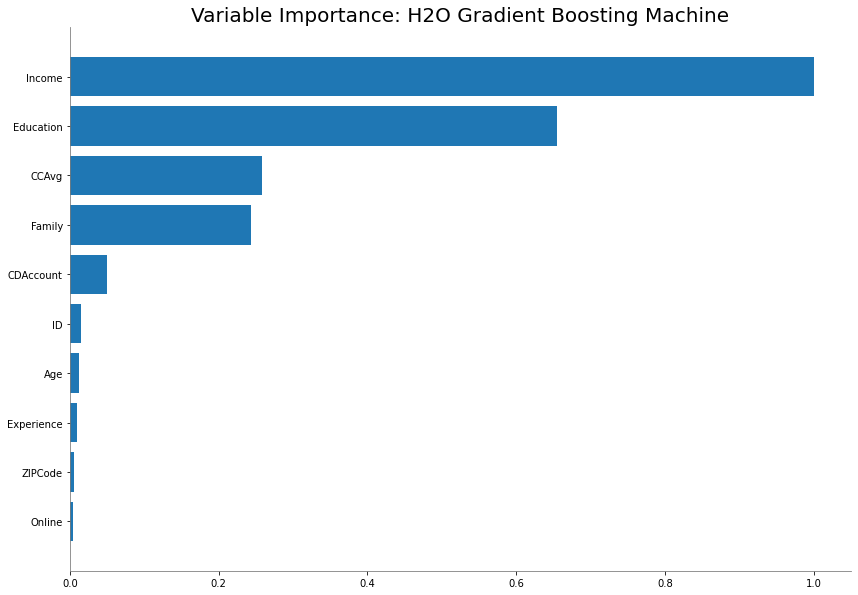

<Figure size 432x288 with 0 Axes>

In [79]:

best_gbm.varimp_plot()

In [80]:
from sklearn.metrics import roc_auc_score
pred_val = (best_gbm.predict(test_df[predictors])).as_data_frame()
true_val = (test_df[target]).as_data_frame()
print(pred_val)
print(true_val)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
    predict        No       Yes
0        No  0.977333  0.022667
1       Yes  0.195684  0.804316
2        No  0.977455  0.022545
3        No  0.977332  0.022668
4        No  0.977455  0.022545
..      ...       ...       ...
981      No  0.976707  0.023293
982      No  0.854022  0.145978
983      No  0.976708  0.023292
984      No  0.973517  0.026483
985      No  0.976833  0.023167

[986 rows x 3 columns]
    y_category
0           No
1          Yes
2           No
3           No
4           No
..         ...
981         No
982         No
983         No
984         No
985         No

[986 rows x 1 columns]


In [83]:
best_gbm.auc()


0.9988544495427162

**We can see the auc is high. Prediction with Yes still performs poor**

**Testing on more parameters**

In [84]:
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=predictors, y=target,
                training_frame=train_df,
                validation_frame=valid_df,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
#gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]
best_gbm2



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid2_model_17


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,23516.0,4.0,4.0,4.0,11.0,16.0,14.09




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.002678532312429287
RMSE: 0.05175453905146182
LogLoss: 0.013589911159226191
Mean Per-Class Error: 0.001694915254237288
AUC: 0.9999950057745731
AUCPR: 0.9999545750930809
Gini: 0.9999900115491462

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4078683250727098: 


,,No,Yes,Error,Rate
0,No,2715.0,0.0,0.0,(0.0/2715.0)
1,Yes,1.0,294.0,0.0034,(1.0/295.0)
2,Total,2716.0,294.0,0.0003,(1.0/3010.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.407868,0.998302,158.0
1,max f2,0.317312,0.997295,163.0
2,max f0point5,0.407868,0.999320,158.0
3,max accuracy,0.407868,0.999668,158.0
4,max precision,0.998297,1.000000,0.0
5,max recall,0.317312,1.000000,163.0
6,max specificity,0.998297,1.000000,0.0
7,max absolute_mcc,0.407868,0.998120,158.0
8,max min_per_class_accuracy,0.317312,0.998527,163.0
9,max mean_per_class_accuracy,0.317312,0.999263,163.0



Gains/Lift Table: Avg response rate:  9.80 %, avg score:  9.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010299,0.994818,10.203390,10.203390,1.00,0.996179,1.000000,0.996179,0.105085,0.105085,920.338983,920.338983,0.105085
1,2,0.020266,0.993445,10.203390,10.203390,1.00,0.994086,1.000000,0.995150,0.101695,0.206780,920.338983,920.338983,0.206780
2,3,0.030233,0.991940,10.203390,10.203390,1.00,0.992760,1.000000,0.994362,0.101695,0.308475,920.338983,920.338983,0.308475
3,4,0.040199,0.989915,10.203390,10.203390,1.00,0.990881,1.000000,0.993499,0.101695,0.410169,920.338983,920.338983,0.410169
4,5,0.050166,0.987600,10.203390,10.203390,1.00,0.988701,1.000000,0.992546,0.101695,0.511864,920.338983,920.338983,0.511864
5,6,0.100000,0.250221,9.795254,10.000000,0.96,0.863999,0.980066,0.928486,0.488136,1.000000,879.525424,900.000000,0.997790
6,7,0.150166,0.015604,0.000000,6.659292,0.00,0.079794,0.652655,0.644963,0.000000,1.000000,-100.000000,565.929204,0.942173
7,8,0.200000,0.005002,0.000000,5.000000,0.00,0.007876,0.490033,0.486220,0.000000,1.000000,-100.000000,400.000000,0.886924
8,9,0.300000,0.001160,0.000000,3.333333,0.00,0.002879,0.326689,0.325106,0.000000,1.000000,-100.000000,233.333333,0.776059
9,10,0.400000,0.000853,0.000000,2.500000,0.00,0.000950,0.245017,0.244067,0.000000,1.000000,-100.000000,150.000000,0.665193




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.010153632951001057
RMSE: 0.10076523681806666
LogLoss: 0.03378098435405636
Mean Per-Class Error: 0.0318536884801945
AUC: 0.9982186488210585
AUCPR: 0.9838636002196475
Gini: 0.996437297642117

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40420487590717086: 


,,No,Yes,Error,Rate
0,No,905.0,8.0,0.0088,(8.0/913.0)
1,Yes,5.0,86.0,0.0549,(5.0/91.0)
2,Total,910.0,94.0,0.0129,(13.0/1004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.404205,0.929730,91.0
1,max f2,0.179545,0.944798,104.0
2,max f0point5,0.932646,0.959079,72.0
3,max accuracy,0.481776,0.987052,89.0
4,max precision,0.997030,1.000000,0.0
5,max recall,0.117170,1.000000,115.0
6,max specificity,0.997030,1.000000,0.0
7,max absolute_mcc,0.404205,0.922748,91.0
8,max min_per_class_accuracy,0.179545,0.978022,104.0
9,max mean_per_class_accuracy,0.117170,0.985214,115.0



Gains/Lift Table: Avg response rate:  9.06 %, avg score:  9.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010956,0.994540,11.032967,11.032967,1.00,0.995850,1.000000,0.995850,0.120879,0.120879,1003.296703,1003.296703,0.120879
1,2,0.020916,0.993235,11.032967,11.032967,1.00,0.993884,1.000000,0.994913,0.109890,0.230769,1003.296703,1003.296703,0.230769
2,3,0.030876,0.991147,11.032967,11.032967,1.00,0.992194,1.000000,0.994036,0.109890,0.340659,1003.296703,1003.296703,0.340659
3,4,0.040837,0.988735,11.032967,11.032967,1.00,0.989525,1.000000,0.992936,0.109890,0.450549,1003.296703,1003.296703,0.450549
4,5,0.050797,0.985936,11.032967,11.032967,1.00,0.987672,1.000000,0.991904,0.109890,0.560440,1003.296703,1003.296703,0.560440
5,6,0.100598,0.296786,7.943736,9.503645,0.72,0.772914,0.861386,0.883493,0.395604,0.956044,694.373626,850.364487,0.940710
6,7,0.150398,0.016377,0.882637,6.649007,0.08,0.092516,0.602649,0.621580,0.043956,1.000000,-11.736264,564.900662,0.934283
7,8,0.200199,0.004157,0.000000,4.995025,0.00,0.007070,0.452736,0.468717,0.000000,1.000000,-100.000000,399.502488,0.879518
8,9,0.299801,0.001044,0.000000,3.335548,0.00,0.002447,0.302326,0.313810,0.000000,1.000000,-100.000000,233.554817,0.769989
9,10,0.400398,0.000847,0.000000,2.497512,0.00,0.000926,0.226368,0.235200,0.000000,1.000000,-100.000000,149.751244,0.659365




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 03:33:50,47.570 sec,0.0,0.297324,0.320681,0.500000,0.098007,1.00000,0.901993,0.287187,0.304324,0.500000,0.090637,1.000000,0.909363
1,,2022-02-14 03:33:50,47.585 sec,1.0,0.274781,0.263167,0.996894,0.975926,10.20339,0.016944,0.265271,0.250348,0.996245,0.969867,11.032967,0.016932
2,,2022-02-14 03:33:50,47.598 sec,2.0,0.256901,0.230709,0.997517,0.980816,10.20339,0.012957,0.248196,0.220151,0.997352,0.976562,11.032967,0.014940
3,,2022-02-14 03:33:50,47.610 sec,3.0,0.241107,0.206997,0.997645,0.981887,10.20339,0.013289,0.233268,0.198345,0.997033,0.974343,11.032967,0.015936
4,,2022-02-14 03:33:50,47.629 sec,4.0,0.226946,0.188083,0.997871,0.983353,10.20339,0.012957,0.220025,0.181008,0.997244,0.975530,11.032967,0.013944
5,,2022-02-14 03:33:50,47.647 sec,5.0,0.214161,0.172437,0.998016,0.984275,10.20339,0.012625,0.208076,0.166578,0.997286,0.975735,11.032967,0.014940
6,,2022-02-14 03:33:50,47.668 sec,6.0,0.202478,0.158945,0.998160,0.985173,10.20339,0.012957,0.197132,0.154027,0.997515,0.978436,11.032967,0.014940
7,,2022-02-14 03:33:50,47.686 sec,7.0,0.191843,0.147239,0.998231,0.985620,10.20339,0.013289,0.187426,0.143373,0.997502,0.978190,11.032967,0.014940
8,,2022-02-14 03:33:50,47.704 sec,8.0,0.182321,0.137127,0.998263,0.985820,10.20339,0.012625,0.178546,0.133881,0.997545,0.978546,11.032967,0.013944
9,,2022-02-14 03:33:50,47.722 sec,9.0,0.173680,0.128181,0.998254,0.985767,10.20339,0.012957,0.170667,0.125663,0.997472,0.977975,11.032967,0.013944



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Income,645.001587,1.000000,0.397439
1,Education,526.018494,0.815531,0.324124
2,Family,218.017792,0.338011,0.134339
3,CCAvg,160.829254,0.249347,0.099100
4,CDAccount,22.815626,0.035373,0.014059
5,Experience,16.085867,0.024939,0.009912
6,Age,13.664210,0.021185,0.008420
7,ID,11.489906,0.017814,0.007080
8,Online,4.126321,0.006397,0.002543
9,ZIPCode,2.230725,0.003458,0.001375


Changing the parameters is not improving much. Hyperparameters has improved accuracy but not recall and F1

In [85]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test_df)
best_gbm_perf2


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.007645206135125136
RMSE: 0.0874368694266048
LogLoss: 0.02972739408743195
Mean Per-Class Error: 0.02827735903062685
AUC: 0.9980202270775689
AUCPR: 0.987177091992767
Gini: 0.9960404541551378

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6601889681120536: 


,,No,Yes,Error,Rate
0,No,889.0,3.0,0.0034,(3.0/892.0)
1,Yes,5.0,89.0,0.0532,(5.0/94.0)
2,Total,894.0,92.0,0.0081,(8.0/986.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.660189,0.956989,89.0
1,max f2,0.312319,0.955882,97.0
2,max f0point5,0.863181,0.981735,83.0
3,max accuracy,0.863181,0.991886,83.0
4,max precision,0.997704,1.000000,0.0
5,max recall,0.019093,1.000000,158.0
6,max specificity,0.997704,1.000000,0.0
7,max absolute_mcc,0.660189,0.952578,89.0
8,max min_per_class_accuracy,0.130792,0.974215,112.0
9,max mean_per_class_accuracy,0.312319,0.978998,97.0



Gains/Lift Table: Avg response rate:  9.53 %, avg score: 10.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010142,0.994968,10.489362,10.489362,1.000000,0.996272,1.000000,0.996272,0.106383,0.106383,948.936170,948.936170,0.106383
1,2,0.020284,0.994056,10.489362,10.489362,1.000000,0.994529,1.000000,0.995401,0.106383,0.212766,948.936170,948.936170,0.212766
2,3,0.030426,0.992520,10.489362,10.489362,1.000000,0.993297,1.000000,0.994700,0.106383,0.319149,948.936170,948.936170,0.319149
3,4,0.040568,0.990476,10.489362,10.489362,1.000000,0.991291,1.000000,0.993847,0.106383,0.425532,948.936170,948.936170,0.425532
4,5,0.050710,0.988491,10.489362,10.489362,1.000000,0.989619,1.000000,0.993002,0.106383,0.531915,948.936170,948.936170,0.531915
5,6,0.100406,0.319571,8.562744,9.535783,0.816327,0.866808,0.909091,0.930542,0.425532,0.957447,756.274425,853.578337,0.947357
6,7,0.150101,0.028862,0.428137,6.520414,0.040816,0.116573,0.621622,0.661052,0.021277,0.978723,-57.186279,552.041403,0.915943
7,8,0.200811,0.006293,0.419574,4.979798,0.040000,0.013648,0.474747,0.497566,0.021277,1.000000,-58.042553,397.979798,0.883408
8,9,0.300203,0.001817,0.000000,3.331081,0.000000,0.003594,0.317568,0.334021,0.000000,1.000000,-100.000000,233.108108,0.773543
9,10,0.401623,0.000882,0.000000,2.489899,0.000000,0.001095,0.237374,0.249949,0.000000,1.000000,-100.000000,148.989899,0.661435


Recall is not that great. We are aimimg here at recall more as we cannot afford more false negatives. The error rate in predicting yes is still more

**More experimenting on different models using one hot encoding and playing with hyperparameters and regularization**

In [86]:
data_onehot=pd.get_dummies(df_pd_org, prefix=None, dummy_na=False, sparse=False, drop_first=True, dtype=None)
data_onehot.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [87]:
data_onehot['Age'].fillna(data_onehot['Age'].median(), inplace=True)

In [88]:
data_onehot.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_PersonalLoan=data_onehot['PersonalLoan']
X_prep = data_onehot.drop(columns=['PersonalLoan'], inplace=False)
X_input = pd.DataFrame(data=scaler.fit_transform(X_prep), index=X_prep.index, columns=X_prep.columns)

**We have scaled the input data here**

In [90]:
X_prep.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
cv = KFold(n_splits=5, shuffle=True, random_state=427)
C_regul = [0.01, 0.1, 1,2,4,5]
for regul in C_regul:
    clf = LogisticRegression(penalty='l2', C=regul).fit(X_input, y_PersonalLoan)
    print('Cross-validation score: %f' % 
          cross_val_score(clf, X_input, y_PersonalLoan, cv=cv, scoring='roc_auc').mean())

Cross-validation score: 0.958247
Cross-validation score: 0.957993
Cross-validation score: 0.957349
Cross-validation score: 0.957242
Cross-validation score: 0.957220
Cross-validation score: 0.957211


We intoduced l2 regularization and tested data on it. Cross validation score revolves around 0.95 for different parameter

In [92]:
df_pd_org['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

**We can see that the number of positive PersonalLoan prediction in the whole data is much less than the negative PersonalLoan prediction. We can assume our model shall be struggling with the training as it is not exposed to much equally sampled data i.e the data has much more 0's than 1's**

**No of ones are very less and hence is the problem**

**Using SMOTE to resample and balance data**

        ID  Age  Experience  ...  CDAccount  Online  CreditCard
0     2628   56          30  ...          0       1           0
1      410   49          22  ...          0       1           0
2     2136   45          15  ...          0       0           0
3     1343   36          12  ...          0       1           0
4     4740   62          38  ...          0       1           1
...    ...  ...         ...  ...        ...     ...         ...
7225   103   44          20  ...          0       0           0
7226  2333   40          14  ...          0       0           0
7227  2901   54          29  ...          0       1           0
7228   816   55          30  ...          0       0           0
7229  1483   51          27  ...          0       0           0

[7230 rows x 13 columns]


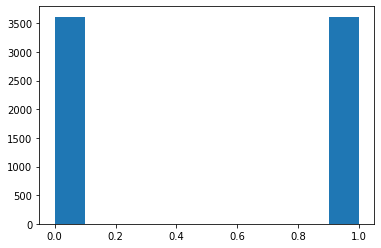

In [96]:
from imblearn.over_sampling import SMOTE
mod=SMOTE()
x_train1,y_train1=mod.fit_resample(x_train_in,y_train_out)
plt.hist(y_train1);
print(x_train1)

**We have balanced the number of 0's and 1's**

**Testing resampled on different regressions**

In [97]:
#Applying Logistic Regression
#Apply l1 penalty
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lg=LogisticRegression(max_iter=500,penalty='l1',solver='liblinear',C=3.0)
#lg=LogisticRegression()
lg.fit(x_train1,y_train1)
print(confusion_matrix(y_test_out,lg.predict(x_test_in)))
print(classification_report(y_test_out,lg.predict(x_test_in)))
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, lg.predict(x_test_in), average='weighted'))
print("Recall")
(recall_score(y_test_out, lg.predict(x_test_in), average='macro'))

[[809  96]
 [ 11  84]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       905
           1       0.47      0.88      0.61        95

    accuracy                           0.89      1000
   macro avg       0.73      0.89      0.77      1000
weighted avg       0.94      0.89      0.91      1000

F1 Score:
0.9069001317523055
Recall


0.8890665891247456

In [98]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out,lg.predict_proba(x_test_in)[:,1])

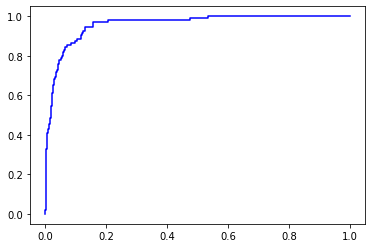

In [99]:
plt.plot(fpr,tpr,color='blue',label='logistic')

**The recall has improved with l1 penalty and the accuracy is good**

In [100]:
df_pd_org.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [101]:
#Testing on GBM classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [ x for x in range(3,10,1)],
    'min_child_weight':[ x for x in range(1,6,1)],
    'n_estimators' : [ x for x in range(1, 150)],
    'gamma' : [0, 0.1, 0.001]
}
grid = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions= params, scoring='roc_auc',cv=5,verbose =3)

In [102]:
grid.fit(x_train1, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0.1, max_depth=6, min_child_weight=3, n_estimators=121;, score=0.998 total time=   1.3s
[CV 2/5] END gamma=0.1, max_depth=6, min_child_weight=3, n_estimators=121;, score=0.998 total time=   1.3s
[CV 3/5] END gamma=0.1, max_depth=6, min_child_weight=3, n_estimators=121;, score=0.999 total time=   1.2s
[CV 4/5] END gamma=0.1, max_depth=6, min_child_weight=3, n_estimators=121;, score=0.999 total time=   1.0s
[CV 5/5] END gamma=0.1, max_depth=6, min_child_weight=3, n_estimators=121;, score=0.998 total time=   0.8s
[CV 1/5] END gamma=0.001, max_depth=8, min_child_weight=3, n_estimators=47;, score=0.998 total time=   0.4s
[CV 2/5] END gamma=0.001, max_depth=8, min_child_weight=3, n_estimators=47;, score=0.998 total time=   0.4s
[CV 3/5] END gamma=0.001, max_depth=8, min_child_weight=3, n_estimators=47;, score=0.998 total time=   0.4s
[CV 4/5] END gamma=0.001, max_depth=8, min_child_weight=3, n_estimators=47;, sco

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0, 0.1, 0.001],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='roc_auc', verbose=3)

In [103]:
grid.best_estimator_

XGBClassifier(max_depth=7, min_child_weight=3, n_estimators=140)

In [104]:
g=grid.best_estimator_.fit(x_train1,y_train1)

In [105]:
g.score(x_train1,y_train1)

0.9997233748271093

In [106]:
x_test_in= x_test_in[x_train1.columns]
x_test_in
g.score(x_test_in,y_test_out)

0.972

In [107]:
y_prediction3=g.predict(x_test_in)
cm2 = confusion_matrix(y_test_out,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out,y_prediction3)
print(cr2)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, (y_prediction3), average='weighted'))
print("Recall")
print(recall_score(y_test_out, y_prediction3, average='weighted'))

[[886  19]
 [  9  86]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       905
           1       0.82      0.91      0.86        95

    accuracy                           0.97      1000
   macro avg       0.90      0.94      0.92      1000
weighted avg       0.97      0.97      0.97      1000

F1 Score:
0.9726222222222222
Recall
0.972


**Recall and accuracy is good**

In [108]:
#The model parameters are found by executing the above code and find the best parameters
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
    }
]

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [111]:
best_clf = clf.fit(x_train1,y_train1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [112]:
best_clf.best_params_

{'C': 1.623776739188721, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [113]:
print (f'Accuracy - : {best_clf.score(x_train1,y_train1):.3f}')

Accuracy - : 0.879


In [114]:
best_clf.best_score_

0.8821576763485477

In [115]:
y_prediction=best_clf.predict(x_test_in)
cm = confusion_matrix(y_test_out,y_prediction)
print(cm)
cr=classification_report(y_test_out,y_prediction)
print(cr)

[[776 129]
 [ 11  84]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       905
           1       0.39      0.88      0.55        95

    accuracy                           0.86      1000
   macro avg       0.69      0.87      0.73      1000
weighted avg       0.93      0.86      0.88      1000



In [116]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, y_prediction, average='weighted'))
print("Recall")
(recall_score(y_test_out, y_prediction, average='weighted'))

F1 Score:
0.8819363851278744
Recall


0.86

**Recall is 0.86 and F1 is 0.88**

**Lets train and test the models by dropping the unimportant variables like gender, work type and residence**

In [117]:
data_onehot.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [120]:
data_dropped=data_onehot.copy()

(array([3616.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3616.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

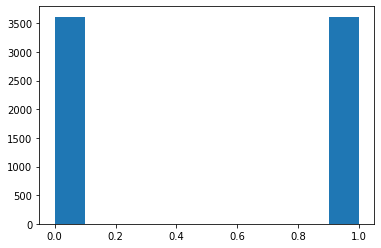

In [121]:
x_infea3=data_dropped.drop(columns='PersonalLoan')
y_outfea3=data_dropped['PersonalLoan']
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(x_infea3,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4)

In [122]:
y_train4.value_counts()

0    3616
1    3616
Name: PersonalLoan, dtype: int64

In [123]:
best_clf2= clf.fit(x_train4,y_train4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [124]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.896


In [125]:
best_clf2.best_score_

0.8857861013921325

In [126]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))

[[787 117]
 [ 16  80]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       904
           1       0.41      0.83      0.55        96

    accuracy                           0.87      1000
   macro avg       0.69      0.85      0.73      1000
weighted avg       0.92      0.87      0.89      1000

F1 Score:
0.8859885274647056
Recall


0.867

Recall score is 0.86 and F1 Score is 0.88. Recall has improved for positive cases

**Now lets test on scaled data**

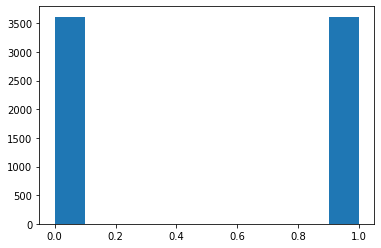

In [127]:
x_infea3=data_dropped.drop(columns='PersonalLoan')
y_outfea3=data_dropped['PersonalLoan']
scaler = StandardScaler()
scaler.fit(x_infea3)
X_scaled = scaler.transform(x_infea3)
X = pd.DataFrame(X_scaled, columns=x_infea3.columns)
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(X,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [128]:
best_clf2= clf.fit(x_train4,y_train4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [129]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.911


In [130]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
from sklearn.metrics import recall_score
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))


[[823  81]
 [ 12  84]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       904
           1       0.51      0.88      0.64        96

    accuracy                           0.91      1000
   macro avg       0.75      0.89      0.80      1000
weighted avg       0.94      0.91      0.92      1000

F1 Score:
0.917448077571335
Recall


0.907

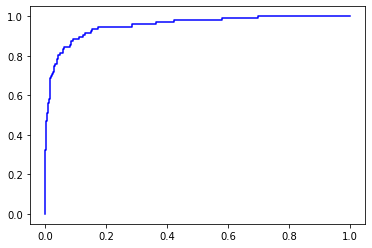

In [131]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out3,best_clf2.predict_proba(x_test_in3)[:,1])
plt.plot(fpr,tpr,color='blue',label='logistic')

Recall on Stroke prediction is good. We have more number of predicting positive stroke and that is great here

**We can see though the accuracy and precision is not that great, the recall and F1 score is good**

In [132]:
#Testing on XGB classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [ x for x in range(3,10,1)],
    'min_child_weight':[ x for x in range(1,6,1)],
    'n_estimators' : [ x for x in range(1, 150)],
    'gamma' : [0, 0.1, 0.001]
}
grid = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions= params, scoring='roc_auc',cv=5,verbose =3)
grid.fit(x_train4, y_train4)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0, max_depth=6, min_child_weight=5, n_estimators=26;, score=0.998 total time=   0.3s
[CV 2/5] END gamma=0, max_depth=6, min_child_weight=5, n_estimators=26;, score=0.999 total time=   0.3s
[CV 3/5] END gamma=0, max_depth=6, min_child_weight=5, n_estimators=26;, score=0.998 total time=   0.3s
[CV 4/5] END gamma=0, max_depth=6, min_child_weight=5, n_estimators=26;, score=1.000 total time=   0.3s
[CV 5/5] END gamma=0, max_depth=6, min_child_weight=5, n_estimators=26;, score=0.999 total time=   0.3s
[CV 1/5] END gamma=0.1, max_depth=6, min_child_weight=5, n_estimators=101;, score=0.999 total time=   1.0s
[CV 2/5] END gamma=0.1, max_depth=6, min_child_weight=5, n_estimators=101;, score=1.000 total time=   1.0s
[CV 3/5] END gamma=0.1, max_depth=6, min_child_weight=5, n_estimators=101;, score=0.999 total time=   1.0s
[CV 4/5] END gamma=0.1, max_depth=6, min_child_weight=5, n_estimators=101;, score=1.000 total time

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0, 0.1, 0.001],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='roc_auc', verbose=3)

In [133]:
grid.best_estimator_

XGBClassifier(gamma=0.001, max_depth=5, min_child_weight=3, n_estimators=102)

In [134]:
g=grid.best_estimator_.fit(x_train4,y_train4)

In [135]:
g.score(x_train4,y_train4)

0.9991703539823009

In [136]:
x_test_in3= x_test_in3[x_train4.columns]
x_test_in3
g.score(x_test_in3,y_test_out3)

0.98

In [137]:
y_prediction3=g.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))

[[894  10]
 [ 10  86]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.90      0.90      0.90        96

    accuracy                           0.98      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000

F1 Score:
0.98
Recall


0.98

Though the accuracy is high in XGB model, the recall for positive predictions is not great

**Best model is logistic regression model with parameters as**

{'penalty' : ['l2'],
'C' : [1.623776739188721],
'solver' : ['lbfgs'],
'max_iter' : [1500]
}

**Abstract and Conclusion**

Abstract

Bank management system can be consider as a most important thing in economic world.in the present scenario the banking sector is the common need in everyday life.in day to day life we face the problems and then we realize something is not done in this sector like we want to change the location (branch) of our account then we need to fill the application and then some day waiting to complete bank process.

Banking and Loan Processes are the basic need today, which depends on multiple criteria which vary from individual to individual.
hence the prediction of probality of getting loan is highly important and one of the major concern in the society.
The factors such as age, Income, eduction, Account information, Mortagage etc. has a huge impact on the loan Processes.
This notebook explains the correlation between these variables which may help in determining the most important features that may impact the Loan Process.


OBJECTIVE:

Determine what makes a chances of getting a personal Loan
Create a machine learning model to perform prediction of number of individual eligible for Loan.

Conclusion:
Multiple checks have been performed to analyze the accuracy and other parameters which have been supported to become the best model with the 
highest accuracy.
I have examined these concepts in the below notebook using H2O's AutoML library for building a Classification model.



**Anwers to Questions**

**Is the relationship significant?**
The relationship is significant as we saw in feature importance,correlations and scores that shows that Income is the most important parameter in the predictions. Income and formerly education are directly linked to PersonalLoan. Also the accuracy, f1 score and recalls are balanced in regression. Cross validation is applied which ensures there is no overfitting in the data. The accuracy and auc stats are good for both on training and test data. Recall is best for Logistic Regression Model.

Since the data is highly imbalanced, there are problems with training of the model. Therefore we used SMOTE

**Are any model assumptions violated?**
Existence of outliers- There are not significant outliers in our models. We can verify this by looking at the description of the data and the percentile ranges.

Lack of strongly influencial outliers- There are no strong outliers to be worry about

Multicollinearity- We saw from the VIF and the correlation tables that there may be some level of correlation between Income, Education and CDAccount but not significant one.

**Is there any multicollinearity in the model**?
There is  sigificant multcollinarity in the model. We can verify this using the correlation matrix and the VIF scores for the data. Though some of the vif scores are high, there is nothing to worry about

**In the multivariate models are predictor variables independent of all the other predictor variables?**
There is no strong evidence that the variables are dependent of each other. However, there may be small relation between Income and Education in our model

**In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**
The most significant variables are Income, Education and CdAccount. We can see from the visualization that there is some significance between Income and Personal Loan. Moreover, the risk of Personal loan increases with the decrease in the average Income and education.

**Does the model make sense?**
Yes our model makes sense. The logistic regression model has the highest recall while the GBM model has the highest accuracy. The model selection is based on what we want. We are aiming here for high recall and f1 though it may trade off the accuracy.

Here, recall is more important than precision. Predicting false negative may be lethal rather than predicting false postive.

Moreover, initially there was an imbalance in the data in predicting the Personal Loan-

0's- 4500 1's-300

This high imbalance in data is not good for our training model and we saw that the model performed well on accuracy and precision but has poor F1 score and recall when predicting for a stroke.

Therefore we resampled the data and saw a significant increase in the recall and f1 score.

**Does regularization help?**
We applied regularization l2 to our model which does not have a significant impact on our model. We can see that the lasso penalty did not have a significant increase in accuracy though it improved our model in terms of precision and recall.

**Which independent variables are significant?**
We can see from feature importance and visualizations that the Income,Education and CDAccount are the most important parameters in predicting heart stroke. These variables are significant in predicting our target variable.

**Which hyperparameters are important?**
The model was iterated through all the possible hyperparameters running over 4800 fits for logistic regression and finding the best parameter among it

{'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 'C' : np.logspace(-4, 4, 20), 'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], 'max_iter' : [100, 1000,2500, 5000] } ]

After running the iterations, we found the best fit for the model and then tweaked the model with the following hyperparameters giving the a great recall and precision.

{'penalty' : ['l2'], 'C' : [1.623776739188721], 'solver' : ['lbfgs'], 'max_iter' : [1500] }

This has optimized the results by giving us a high recall and a high F1 score.

**Did I explain my licensing clearly? **

MIT License

Copyright (c) 2022 Nikita5137/002199947

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.